## Трек «CV-инженер» 
### Skillfactory: DSPR-19
### Модуль 5. Hard & Software. Часть II. TensorFlow и Keras для задач CV

### 1. Что вас ждёт в этом модуле?

→ В предыдущем модуле вы узнали больше о «железе», которое используют дата-сайентисты. Теперь мы познакомимся с софтом, который используют специалисты по компьютерному зрению. В первую очередь это библиотеки для глубокого обучения **TensorFlow, Keras** и **PyTorch.**

И начнём мы с библиотеки **Keras.**

Keras в данный момент является частью библиотеки TensorFlow, хотя исторически эти библиотеки создавались независимо. Поэтому, упоминая TensorFlow, подразумеваем также Keras.

### В ЭТОМ МОДУЛЕ МЫ РАЗБЕРЁМ:

- на каких принципах основана работа библиотек для глубокого обучения;

- как строить и обучать модели в Keras;

- как подготавливать данные в Keras;

### ВЫ НАУЧИТЕСЬ:

- решать CV-задачу на Keras и TensorFlow: обучим модель, умеющую различать выражения лица человека с помощью датасета Facial expression comparison и самых актуальных на 2021 год свёрточных сетей.

Хотя материал модуля на первый взгляд может показаться сложным, он проще, чем кажется. В этом модуле мы не будем углубляться в теорию. Если архитектура и способ обучения сети уже известны, то запрограммировать её, как правило, несложно. Вам не потребуется писать много кода — в основном вы будете изучать уже написанный код. Постарайтесь понять принцип его работы, чтобы затем ответить на несложные вопросы на понимание.

МАТЕРИАЛЫ МОДУЛЯ ПОДГОТОВИЛИ:
	
ОЛЕГ ЗЯБЛОВ

Выпускник магистратуры факультета информационных технологий НГУ, исследователь в области Deep Learning.

### ПОЧЕМУ МЫ ИЗУЧАЕМ СРАЗУ ОБЕ БИБЛИОТЕКИ: TENSORFLOW И PYTORCH?

⛏ Специалист по компьютерному зрению должен знать обе эти библиотеки, поскольку в работе вам часто придётся использовать чужой код, а он может быть написан как на TensorFlow, так и на PyTorch.

В дальнейшем в курсе «CV-инженер» вы в основном будете работать с библиотекой PyTorch, но на первом году обучения вы работали с библиотекой TensorFlow.

В данном модуле мы также начнём с TensorFlow, а затем изучим PyTorch.

Динамика популярности TensorFlow, Keras и PyTorch за последние 5 лет:

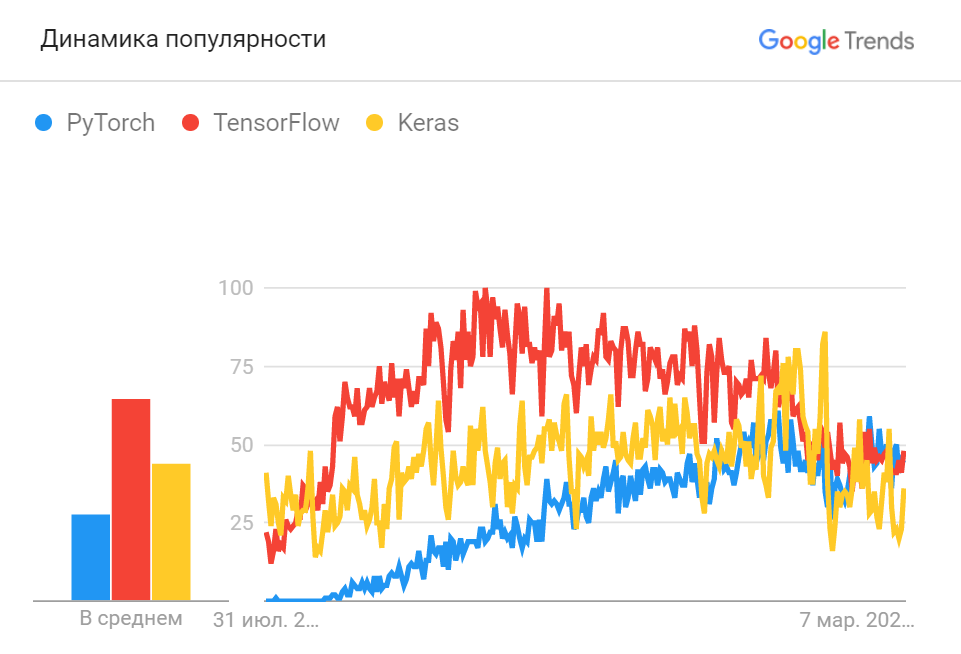

→ TensorFlow разработан в компании Google, PyTorch — в компании Facebook. Автором библиотеки Keras является François Chollet, работающий сейчас в Google. Постепенно библиотека Keras стала частью TensorFlow.

### ДЛЯ ОСВОЕНИЯ ЭТОГО МОДУЛЯ ВАМ МОЖЕТ ПОТРЕБОВАТЬСЯ ПОВТОРИТЬ СЛЕДУЮЩИЕ ПОНЯТИЯ:

- Граф вычислений
- Нейронная сеть
- Обратное распространение ошибки
- Стохастический градиентный спуск
- Обучение мини-батчами
- Инференс

Прежде чем начать освоение модуля, давайте выполним несколько заданий ↓

### Задание 1.1

Выберите утверждения, которые верны для всех искусственных нейронных сетей:
- Являются графами вычислений

### Задание 1.2

Выберите верные утверждения:
- Выбор оптимизатора (SGD, Adam и т. д.) не влияет на алгоритм расчёта градиентов
- Некоторые слои нейронных сетей работают по-разному в режиме обучения и инференса


### 2. Принципы работы библиотек для глубокого обучения

⛏ Как вы помните, нейронная сеть — это последовательность векторных и матричных операций. Такие операции можно реализовать даже с помощью NumPy. Для инференса этого будет достаточно. Но если мы хотим обучать сеть, мы должны реализовать алгоритм обратного распространения ошибки. Именно это и есть ключевая возможность библиотек для глубокого обучения.

Рассмотрим модель из нескольких полносвязных (или любых других) слоёв:

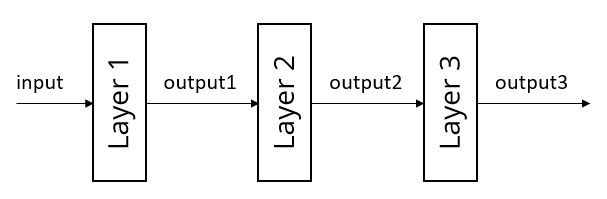

Чтобы воспользоваться алгоритмом обратного распространения ошибки, нам нужно запоминать выходы всех слоёв: output1, output2, output3. Если же мы делаем инференс, то после получения output2 можно удалить из памяти output1 — он нам больше не нужен. Аналогично, получив output3, удаляем output2.

Поэтому для обучения требуется существенно больше оперативной памяти, чем для инференса. За счёт этого при инференсе можно использовать больший размер батча.

В библиотеках TensorFlow и PyTorch веса и выходные данные каждого слоя сети хранятся не в NumPy-массивах, а в так называемых тензорах (объектах tf.Tensor, tf.EagerTensor, torch.Tensor).

**Основные отличия тензора от NumPy-массива в следующем:**

- Тензоры, как правило, хранятся в памяти GPU или TPU.
- История операций над тензорами (таких как сложение, умножение) запоминается таким образом, чтобы по графу вычислений можно было «пройти в обратную сторону» и рассчитать градиенты.


**Уточнение**: понятие «тензор» в глубоком обучении не эквивалентно математическому понятию тензора, это разные вещи.  

Помимо основной функциональности (дифференцирование графа вычислений), библиотеки TensorFlow и PyTorch также представляют широкий набор дополнительных возможностей:

- Большое количество разнообразных слоёв для нейронных сетей и оптимизаторов.
- Построение пайплайнов (pipeline): скачивание датасетов, объединение в батчи, аугментации.
- Доступны наборы уже обученных нейронных сетей.
- Модели можно сохранять в файлы и загружать из файлов.

### СТАТИЧЕСКИЙ И ДИНАМИЧЕСКИЙ ГРАФ ВЫЧИСЛЕНИЙ

Существует два основных подхода к построению графов вычислений:

При **декларативном** (то есть описательном) подходе граф вычислений строится заранее, а затем по нему «пропускаются» данные.

Выполняя операции над тензорами, мы не выполняем вычислений, а только строим граф (это напоминает построение трубопровода). Затем весь граф целиком мы запускаем одной командой. Граф вычислений при этом называется **статическим.**

При **императивном** подходе, выполняя операции над тензорами, мы сразу получаем результат. При этом граф вычислений не описывается заранее и называется **динамическим.**

Давайте разберём основные плюсы и минусы обоих подходов:

### СТАТИЧЕСКИЙ ГРАФ ВЫЧИСЛЕНИЙ

✔ Библиотека «заранее знает» порядок операций в графе. Это позволяет эффективно оптимизировать граф в плане скорости вычислений и потребляемой памяти.

⛔ Сложнее писать и отлаживать код по сравнению с динамическим графом вычислений.

### ДИНАМИЧЕСКИЙ ГРАФ ВЫЧИСЛЕНИЙ

✔ Код проще и интуитивно понятнее.

⛔ Библиотека «не знает», какую операцию вы выполните следующей, что затрудняет оптимизацию скорости вычислений и потребляемой памяти. Однако есть способ преодолеть эту проблему путём анализа исходного кода модели и JIT-компиляции.

- В **PyTorch** используется динамический граф вычислений.

- В **TensorFlow** версии 1 использовался только статический граф вычислений, что усложняло написание кода и заставило многих разработчиков перейти на PyTorch.

- В **TensorFlow** версии 2 граф вычислений можно строить как динамически (eager mode), так и статически (graph mode). Однако мы не будем писать код на чистом TensorFlow, а будем использовать Keras.

- В **Keras** граф вычислений преимущественно статический, однако при желании можно переключить его в динамический режим (eager mode).

В целом разработчики TensorFlow придерживаются точки зрения о том, что по возможности лучше использовать статический граф вычислений для повышения производительности.

⛏ Разница на практике между статическим и динамическим графом вычислений станет более понятна из следующих разделов. При построении простых моделей этот момент не принципиален, он приобретает важность, только если вы делаете что-то сложное и нестандартное.

### 3. Построение моделей в Keras

Начнём с импорта библиотеки:



In [2]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Model, Sequential, layers
import numpy as np

Немного истории. Раньше Keras был отдельной библиотекой, для которой были доступны разные вычислительные «бэкенды»: TensorFlow, Theano, CNTK, PlaidML. При этом Keras описывает высокоуровневые абстракции, такие как полносвязный слой и цикл обучения, и конвертирует их в более низкоуровневые инструкции, такие как матричное умножение, сложение, прямой и обратный проход. Эти операции выполняются с помощью бэкенда.

Начиная с версии 2.3, Keras поддерживает TensorFlow 2, а с версии 2.4 больше не поддерживает (https://github.com/keras-team/keras/releases/tag/2.4.0) другие бэкенды, кроме TensorFlow. С этого момента Keras становится частью библиотеки TensorFlow.

Keras и сейчас доступен в виде отдельной библиотеки (!pip install keras ), но такой вариант импорта (import keras) считается устаревшим и может неправильно работать с версиями TensorFlow 2.5 и выше.

### ПОСТРОЕНИЕ МОДЕЛИ SEQUENTIAL

Для создания моделей в Keras есть два основных класса: **Sequential и Model.**

Класс **Sequential** является подклассом **Model** и описывает модель, состоящую из цепочки слоёв, выполняющихся последовательно.

Например, так мы создадим модель c двумя скрытыми слоями по 100 нейронов и функцией активации ReLU и выходным слоем из 10 нейронов с функцией активации softmax:

In [2]:
model = Sequential([
  layers.InputLayer(input_shape=(50,)),
  layers.Dense(100, 'relu'),
  layers.Dense(100, 'relu'),
  layers.Dense(10, 'softmax')
])

**Примечание**: в модель Sequential можно добавлять новые слои методом .add(), но в таком действии редко бывает необходимость. Удобнее сразу передавать в конструктор Sequential все слои в виде списка.  

Слой _InputLayer_ не выполняет вычислений и лишь указывает размер входных данных сети. Мы можем убрать этот слой и вместо этого указать параметр input_shape у первого полносвязного слоя:

In [3]:
model = Sequential([
  layers.Dense(100, 'relu', input_shape=(50,)),
  layers.Dense(100, 'relu'),
  layers.Dense(10, 'softmax')
])

Слои модели хранятся в виде списка в атрибуте .layers. Напечатать структуру модели можно, вызвав метод .summary():



In [4]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 100)               5100      
_________________________________________________________________
dense_4 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_5 (Dense)              (None, 10)                1010      
Total params: 16,210
Trainable params: 16,210
Non-trainable params: 0
_________________________________________________________________


Каждому слою присвоено уникальное имя, для каждого слоя созданы массивы весов, общее количество весов каждого слоя указано в столбце Param #. Снизу указано суммарное количество весов сети. Поскольку у полносвязных слоёв все веса обучаемы, то количество обучаемых весов равно общему количеству весов. В столбце Output Shape по первой оси указан размер None. Эта ось отвечает за размер батча — он может  быть любым.

Любую модель можно вызвать как функцию, передав в качестве параметра батч входных данных и получив батч выходных данных в виде тензора. Тензор затем можно преобразовать в NumPy-массив методом .numpy():



In [5]:
batch_size = 64
input_batch = np.zeros((batch_size, 50))
output = model(input_batch).numpy() #получаем массив размером (64, 10)

**Пояснение**: если некий Python-объект вызывается как функция, то для этого объекта неявно вызывается метод .__call__().  

При вызове модели как функции можно передать дополнительный параметр training=True, который означает запуск модели в режиме обучения (например, будет работать слой Dropout). По умолчанию модель запускается в режиме инференса.



In [7]:
model = Sequential([
  layers.Dropout(0.999)
])
 
print(model(np.ones((1, 5))).numpy())
print(model(np.ones((1, 5)), training=True).numpy())

[[1. 1. 1. 1. 1.]]
[[0. 0. 0. 0. 0.]]


Вспомним, что слой Dropout случайным образом зануляет указанную долю значений в тензоре, передаваемом через этот слой. Этот слой работает в режиме обучения и не работает в режиме инференса.

При создании модели мы можем вообще не указывать размер входных данных (ни с помощью InputLayer, ни с помощью input_shape первого слоя). В этом случае размер входных данных будет рассчитан автоматически при первом вызове модели. В этот же момент будут созданы веса слоёв. Если попытаться получить summary по модели до того, как созданы веса слоёв, то будет выброшено исключение: This model has not yet been built.

### Задание 3.1

Постройте модель, состоящую из трёх последовательно соединённых полносвязных слоёв с 300, 200 и 100 нейронами. Модель принимает на вход вектор длиной 400. Сколько весов суммарно у этой сети?
Примечание: функция активации в данном задании не имеет значения.

model = Sequential([  
  layers.InputLayer(400),  
  layers.Dense(300),  
  layers.Dense(200),  
  layers.Dense(100),  
])  
model.summary()

In [8]:
model = Sequential([
  layers.InputLayer(400),
  layers.Dense(300),
  layers.Dense(200),
  layers.Dense(100),
])
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 300)               120300    
_________________________________________________________________
dense_7 (Dense)              (None, 200)               60200     
_________________________________________________________________
dense_8 (Dense)              (None, 100)               20100     
Total params: 200,600
Trainable params: 200,600
Non-trainable params: 0
_________________________________________________________________


### ПОСТРОЕНИЕ МОДЕЛИ В ФУНКЦИОНАЛЬНОМ СТИЛЕ

⛏ Построение модели через конструктор класса Model — более общий способ, позволяющий строить разветвлённые графы вычислений.

Модель, аналогичная той, что мы строили выше, в функциональном стиле строится так:



In [9]:
input = keras.Input(shape=(50,))
output1 = layers.Dense(100, 'relu')(input)
output2 = layers.Dense(100, 'relu')(output1)
output3 = layers.Dense(10, 'softmax')(output2)
model = Model(inputs=input, outputs=output3)

На этом примере хорошо видно, что мы строим статический граф вычислений (см. предыдущий раздел). Модель Sequential также является статическим графом.

1) Сначала мы указываем размер входных данных.

2) Затем создаём слои и вызываем каждый слой как функцию. При этом слой принимает и возвращает объект класса KerasTensor. При этом пока что не происходит никаких вычислений — мы лишь указываем последовательность операций.

3) Далее мы вызываем конструктор класса Model, передав в него начало и конец построенного графа.

Лучше по возможности избегать функционального стиля, так как код получается сложнее, а значит, больше шанс сделать ошибку и сложнее вносить изменения. Строить модель в функциональном стиле имеет смысл только при разветвлённом графе вычислений.

Для примера предположим, что у нас есть глубокая полносвязная нейронная сеть (MLP) из трёх слоёв, решающая задачу регрессии на табличных данных (50 признаков). Но при этом у нас есть подозрение, что ответ может линейно зависеть от некоторых входных признаков. Для того чтобы сети было проще выучить такую зависимость, мы делаем «проброс» связи через всю сеть (skip connection).

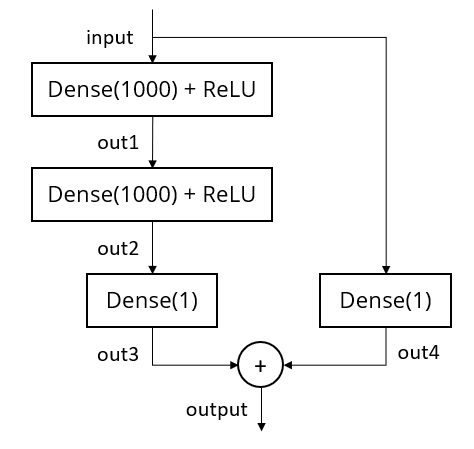

Давайте построим эту модель:



In [10]:
input = keras.Input(shape=(50,))
out1 = layers.Dense(1000, 'relu')(input)
out2 = layers.Dense(1000, 'relu')(out1)
out3 = layers.Dense(1)(out2)
out4 = layers.Dense(1)(input)
output = out3 + out4
model = Model(inputs=input, outputs=output)

→ В предпоследней строке мы складываем друг с другом два промежуточных выхода модели (два объекта KerasTensor). Важно понимать, что с точки зрения языка Python в данном коде используется перегрузка операторов, например out3 + out4 вызывает out3.__add__( out4). За счёт этого мы можем складывать тензоры как числа. Также можно использовать следующий синтаксис: tf.math.add(out3, out4) или layers.Add()([out3, out4]). Результат во всех случаях будет эквивалентен.

У модели может быть несколько входов или выходов. Например, если мы хотим, чтобы модель возвращала не только output, то и out3, мы создадим её таким образом:

In [11]:
model = Model(inputs=input, outputs=[output, out3])

### Задание 3.2

Одна из известных свёрточных архитектур называется DenseNet (https://arxiv.org/pdf/1608.06993.pdf). Она состоит из блоков, в которых каждый слой связан со всеми последующими.

Попробуем построить её аналог, но в нашем случае слои будут полносвязными. Архитектура сети показана на иллюстрации ниже.

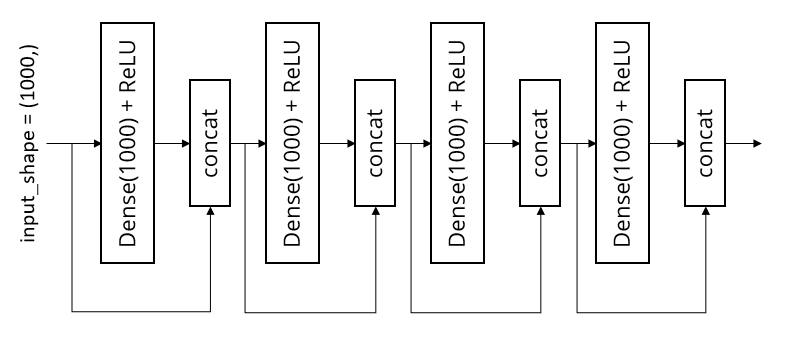

Операция concat означает конкатенацию и выполняется с помощью слоя layers.Concatenate(). Посмотрите документацию по этому слою с примерами использования и постройте данную сеть с помощью Keras.

Сколько весов суммарно у получившейся сети?



In [12]:
input = keras.Input(shape=(1000,))
output = input
for _ in range(4):
  output = layers.Concatenate()([output, layers.Dense(1000, 'relu')(output)])
model = Model(inputs=input, outputs=output)
model.summary()

Model: "model_3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_5 (InputLayer)            [(None, 1000)]       0                                            
__________________________________________________________________________________________________
dense_16 (Dense)                (None, 1000)         1001000     input_5[0][0]                    
__________________________________________________________________________________________________
concatenate (Concatenate)       (None, 2000)         0           input_5[0][0]                    
                                                                 dense_16[0][0]                   
__________________________________________________________________________________________________
dense_17 (Dense)                (None, 1000)         2001000     concatenate[0][0]          

### ПОСТРОЕНИЕ МОДЕЛИ В КОМБИНИРОВАННОМ СТИЛЕ

Если ветвления требуют от нас использовать функциональный стиль, то это не означает, что всю модель нужно строить в функциональном стиле. Можно использовать комбинированный подход:

In [13]:
input = keras.Input(shape=(50,))
branch1 = Sequential([
  layers.Dense(1000, 'relu'),
  layers.Dense(1000, 'relu'),
  layers.Dense(1)
])
branch2 = layers.Dense(1)
output = branch1(input) + branch2(input)
model = Model(inputs=input, outputs=output)

### ИЕРАРХИЧЕСКИЕ МОДЕЛИ

⛏ Класс Model является подклассом класса Layer, то есть каждая модель является слоем. Это означает, что модель можно использовать в качестве слоя другой модели.

Например, в модуле keras.applications есть сеть **Xception**. Это свёрточная сеть довольно сложной архитектуры, построенная в функциональном стиле. На странице документации (https://www.tensorflow.org/api_docs/python/tf/keras/applications/xception/Xception) вы можете посмотреть её исходный код, нажав «View source on GitHub».

Сеть Xception является моделью, но её можно использовать в качестве слоя другой модели, например таким образом:

In [14]:
from tensorflow.keras.applications import Xception
model = Sequential([
  Xception(include_top=False, input_shape=(150, 150, 3)),
  layers.GlobalMaxPool2D(),
  layers.Dropout(0.5),
  layers.Dense(10)
])

83697664/83683744 [==============================] - 233s 3us/step


Сейчас мы не рассматриваем подробно сеть Xception и слой GlobalMaxPool2D — изучим их позже. Сейчас это лишь иллюстрация построения вложенных моделей в Keras.  

У получившейся модели четыре слоя, а у её первого слоя (сети Xception) 132 слоя:

In [ ]:
print(len(model.layers)) #4
print(len(model.layers[0].layers)) #132

Для сравнения — мы могли бы построить ту же самую модель таким образом:



In [15]:
base_model = Xception(include_top=False, input_shape=(150, 150, 3))
output = layers.GlobalMaxPool2D()(base_model.output)
output = layers.Dropout(0.5)(output)
output = layers.Dense(10)(output)
model = Model(inputs=base_model.input, outputs=output)

В этом случае Xception уже не будет вложенной моделью, все слои Xception станут слоями model. У модели model будет 135 слоёв.

Один и тот же слой может принадлежать нескольким моделям. Например, пусть у нас есть модель из трёх полносвязных слоёв:

In [16]:
model = Sequential([
  layers.InputLayer(400),
  layers.Dense(300),
  layers.Dense(200),
  layers.Dense(100),
])

Если мы хотим получить выходное значение второго слоя модели, то можно запустить по очереди первый и второй слои:



In [17]:
input_data = np.zeros((64, 400))
l1, l2, l3 = model.layers
layer2_output = l2(l1(input_data)).numpy()

Но есть и другой способ: создать ещё одну модель, входом которой является вход исходной модели, а выходом — выход второго слоя исходной модели. Это не приведёт к копированию слоёв или весов, новая модель будет использовать слои и веса старой модели.

In [18]:
submodel = Model(inputs=model.input, outputs=model.layers[1].output)
layer2_output = submodel(input_data).numpy()

В данном случае модель model является графом вычислений, а модель submodel является подграфом этого графа.

### СОХРАНЕНИЕ И ЗАГРУЗКА МОДЕЛЕЙ

Можно сохранить и загрузить модель из файла следующим кодом:

In [19]:
model.save('model.h5') #сохранение
model = keras.models.load_model('model.h5') #загрузка

Можно также загрузить в уже созданную модель веса из файла (model.load_weights), но обычно это не требуется. Расширения .h5 и .hdf5 эквивалентны и означают один и тот же формат файла — Hierarchical Data Format версии 5.  

- Документация по TensorFlow и Keras (https://www.tensorflow.org/api_docs/python/tf/keras)

- Туториалы по TensorFlow (https://www.tensorflow.org/tutorials)

- Ещё один сайт (https://keras.io/getting_started/) с документацией и гайдами по Keras

- Документация по Model (https://www.tensorflow.org/api_docs/python/tf/keras/Model), Sequential (https://www.tensorflow.org/api_docs/python/tf/keras/Sequential), Input (https://www.tensorflow.org/api_docs/python/tf/keras/Input)

### 4. Слои и их параметры в Keras

⛏ Модуль keras.layers (https://keras.io/api/layers/) содержит большое количество разнообразных слоёв, из которых строятся нейронные сети. В этом разделе мы изучим полносвязные слои, функции активации, считывание и изменение весов слоя, а также кратко рассмотрим, как выполнять произвольные операции в графе.

Так же, как и модель, слой можно запустить как функцию, передав батч входных данных и получив результат. Если модель состоит из цепочки последовательно соединённых слоёв, то, запустив по очереди каждый слой, получим тот же результат, как если бы запустили модель целиком.

### СЧИТЫВАНИЕ И ИЗМЕНЕНИЕ ВЕСОВ СЛОЯ

Веса слоя могут быть получены в виде NumPy-массива методом .get_weights(). Например, полносвязный слой размером N нейронов с input_shape=(M,) вернёт пару из матрицы весов размером (M, N) и матрицы байасов размером (N,).

Вручную изменить веса слоя можно методом .set_weights(). Этот метод принимает данные в том же формате, в каком возвращает их метод .get_weights(). Например, таким образом можно обнулить байасы полносвязного слоя с индексом 0:


In [20]:
layer = model.layers[0]
W, b = layer.get_weights()
layer.set_weights((W, np.zeros_like(b)))

Если вызвать функцию .get_weights() для модели (а не для слоя), то функция вернёт кортеж (tuple) из всех весов модели. Например, если модель состоит из трёх полносвязных слоёв, то функция .get_weights() вернёт кортеж из шести массивов: W1, b1, W2, b2, W3, b3.

При создании слоя не в составе модели веса слоя не будут созданы. Параметр input_shape будет проигнорирован. Для создания весов нужно один раз запустить слой, передав в него входные данные, либо вызвать метод .build(input_shape):

In [21]:
layer = layers.Dense(100)
print([x.shape for x in layer.get_weights()])
layer.build((20,)) #или так: layer(np.zeros((1, 20)))
print([x.shape for x in layer.get_weights()])

[]
[(20, 100), (100,)]


### Задание 4.1

Создайте уже известную нам из предыдущего раздела модель Xception. Переберите в цикле все её слои и посчитайте суммарное количество весов для каждого слоя. Постройте график зависимости количества весов от номера слоя. Какой вывод можно сделать?

- В последних слоях весов в среднем больше, чем в первых

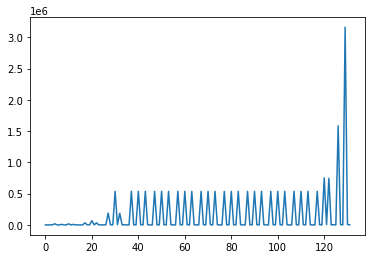

In [22]:
from tensorflow.keras.applications import Xception
model = Xception(include_top=False, input_shape=(150, 150, 3))
 
def count_weights_in_layer(layer):
  array_lengths = [len(W.flat) for W in layer.get_weights()]
  return sum(array_lengths)
 
W = [count_weights_in_layer(layer) for layer in model.layers]
 
import matplotlib.pyplot as plt
plt.plot(W)
plt.show()

В свёрточных сетях, как правило, наибольшее количество весов сосредоточено в последних слоях. Колебания количества весов (вид графика в виде «расчёски») обусловлены тем, что в некоторых слоях весов вообще нет, например в слое Activation и MaxPooling2D.

### ФУНКЦИИ АКТИВАЦИИ В KERAS

⛏ Вы уже знаете, как создать **полносвязный слой** (https://keras.io/api/layers/core_layers/dense/) с выбранным количеством нейронов и функцией активации ReLU.

In [5]:
from tensorflow.keras import layers
layers.Dense(1000, activation='relu')

Если мы не указываем параметр activation, то получим линейный слой без функции активации. Функцию активации можно указать в виде отдельного слоя.

Рассмотрим несколько примеров кода.



In [2]:
layers.Dense(1000),
layers.Activation('relu')

В этом примере мы создаём полносвязный слой без функции активации, а затем функцию активации как отдельный слой. 

Для некоторых часто используемых функций активации, например ReLU или Softmax, в Keras существуют собственные классы (https://keras.io/api/layers/activation_layers/):

In [ ]:
model = Sequential([
  layers.Dense(100),
  layers.ReLU(),
  layers.Dense(10),
  layers.Softmax()
])

Когда мы использовали слой Activation или параметр activation в слое Dense, мы передавали в него название функции активации в виде строки. В этом случае Keras ищет функцию активации с данным названием, для чего неявно вызывается следующий метод:

In [ ]:
keras.activations.get('relu')

Данный метод ищет функцию активации по названию и возвращает её в виде функции. Мы можем сразу указать её не в виде строки, а в виде функции:

In [ ]:
layers.Dense(1000, activation=keras.activations.relu)

→ В следующих разделах мы будем работать с функциями потерь, оптимизаторами и метриками. Там действует тот же принцип: если функция потерь, оптимизатор или метрика указаны в виде строки, то Keras ищет соответствующий класс по названию. Но вместо названия в виде строки мы можем сразу указать нужный нам объект. В примере выше это функция keras.activations.relu.

Библиотека Keras изначально поддерживала разные вычислительные бэкенды. Сейчас она поддерживает только TensorFlow, и поэтому вместо функции-обёртки из модуля keras.activations мы можем сразу указывать нужную нам операцию в TensorFlow:



In [ ]:
layers.Dense(1000, activation=tf.nn.relu)

Здесь начинает проявляться гибкость в построении моделей на Keras. Вместо tf.nn.relu мы можем выполнить вообще любую операцию. Представим, что в одной из недавних статьей авторы предлагают использовать функцию активации f(x) = sin(x) + x и бьют с этой функцией рекорды точности. Мы можем легко реализовать эту функцию в нашей модели:

In [ ]:
my_activation = lambda x: tf.math.sin(x) + x
l = layers.Dense(1000, activation=my_activation)

### ПОЛНОСВЯЗНЫЙ СЛОЙ В KERAS

→ Полносвязный слой Dense принимает на вход массив данных с двумя осями: первая ось отвечает за номер примера в батче, вторая ось — за номер входного признака. Возвращает слой также массив с двумя осями, но теперь вторая ось отвечает за номер выходного нейрона.

Строго говоря, слой Dense может принимать и массив данных с большим количеством осей, но это работает неочевидным образом и не рекомендуется к использованию.

Давайте изучим остальные параметры, доступные в конструкторе (https://keras.io/api/layers/core_layers/dense/) полносвязного слоя.

In [7]:
use_bias=True #Boolean, whether the layer uses a bias vector.

Если выберем значение False, слой не будет выполнять сложение, а будет выполнять только матричное умножение и (опционально) функцию активации.

In [8]:
kernel_initializer="glorot_uniform" #Initializer for the kernel weights matrix.
bias_initializer="zeros" #Initializer for the bias vector.

Матрица весов инициализируется способом glorot uniform (или xavier uniform, что то же самое), а вектор байасов инициализируется нулями. Здесь работает тот же принцип, что описан выше для функций активации: если нечто указано в виде строки, то идёт поиск класса по названию. Например, строка "glorot_uniform" соответствует классу keras.initializers.GlorotUniform. Подробнее про инициализацию весов можно прочитать на странице документации (https://keras.io/api/layers/initializers/).

Инициализация весов слоя каждый раз происходит случайным образом. Создав одинаковую модель дважды, мы получим две модели с разными начальными весами.

Если хочется достичь воспроизводимости результатов, перед созданием модели можно зафиксировать зерно случайного генератора:



In [ ]:
tf.random.set_seed(0)

**Есть и ещё одна тонкость:** при обучении свёрточных сетей на GPU процесс обучения идёт недетерминированно, поэтому даже две сети с одинаковыми начальными весами после обучения станут разными.

Остальные параметры полносвязного слоя:



In [10]:
kernel_regularizer=None,
bias_regularizer=None,
activity_regularizer=None,
kernel_constraint=None,
bias_constraint=None

→ С помощью этих параметров можно указать способ регуляризации весов и ограничения, накладываемые на веса. Мы сейчас не будем углубляться в эти темы. Эти параметры также можно задавать в виде строк или объектов.

### СЛОЙ FLATTEN

⛏ Как мы помним, полносвязный слой принимает на вход массив данных с двумя осями, то есть каждому примеру в батче соответствует вектор признаков.

Что делать, если на входе у нас изображение, которое имеет две оси (чёрно-белое) или три оси (цветное), а мы хотим использовать для его обработки полносвязный слой?

В этом случае нам нужно сначала применить слой Flatten().

Слой Flatten() не имеет весов и «вытягивает в вектор» массив данных по каждому обучающему примеру, давая на выходе массив с двумя осями. Посмотрим, как эта операция выглядела бы на NumPy:

In [ ]:
input = np.zeros((64, 256, 256, 3))
output = input.reshape(len(input), -1)
output.shape #(64, 196608)

А вот как функционирует модель с этим слоем:



In [14]:
from tensorflow.keras import layers, Sequential
model = Sequential([
  layers.Flatten(),
  layers.Dense(100, 'relu'),
  layers.Dense(10, 'softmax')
])
 
input = np.zeros((64, 256, 256, 3))
model(input).numpy().shape #(64, 10)

(64, 10)

### Задание 4.2

Сколько весов в примере выше имеет скрытый полносвязный слой после первого запуска модели?  
Подсказка: Слой Flatten выдаёт массив размером (64, 256*256*3) = (64, 196608). Поэтому скрытый полносвязный слой имеет 100 нейронов и принимает на вход 196608 признаков. Матрица весов слоя имеет размер 196608*100, матрица байсов имеет размер 100. В сумме получаем 19660900 весов.  
- 19660900


На практике, если входные данные имеют больше двух осей, то, как правило, это либо изображение, либо некая последовательность, например векторизованный текст. В обоих случаях используются специальные слои, которые не требуют слоя Flatten(). Забегая вперёд, можно сказать, что иногда слой Flatten() можно встретить в свёрточных сетях после последнего свёрточного слоя. Мы рассмотрим это в следующих модулях.

### LAMBDA-СЛОЙ

Нередко возникает необходимость встроить в граф вычислений какое-то нестандартное действие, для которого отсутствует уже готовый слой. Такие нестандартные действия бывают двух типов:

**Stateles** — выполнение операции, которая не содержит обучаемых параметров, например прибавление единицы к каждому элементу массива.

**Stateful** — выполнение операции, которая использует обучаемые параметры. Например, это может быть вариация полносвязного слоя, где вместо матричного умножения выполняется скалярное произведение.

Для первого типа операций используется слой Lambda, для второго типа — подкласс класса Layer.

Слой Lambda принимает в качестве параметра функцию, которую нужно выполнить над входными данными. Эта функция может содержать операции TensorFlow (такие как tf.nn.relu, tf.math.sin, tf.math.maximum и многие другие) и арифметические операции. Последние по сути также являются операциями TensorFlow, так как используется перегрузка операторов.

Например, один из вариантов нормализации входных данных — деление значений пикселей входного изображения на 255. Это можно реализовать, добавив в начало модели следующий слой:



In [15]:
layers.Lambda(lambda x: x/255)

Хотя для данной цели в Keras есть и специальный слой:



In [16]:
layers.experimental.preprocessing.Rescaling(1/255)


### Задание 4.3

Рассмотрим следующую модель:

In [17]:
model = Sequential([
  layers.Lambda(lambda x: x/255),
  layers.Dense(1000, 'relu', use_bias=False),
  layers.Dense(1000, 'relu', use_bias=False),
  layers.Dense(1),
])

После того как мы создали и обучили эту модель, мы перенесли слой Lambda из самого начала в самый конец модели:



In [19]:
model_new = Sequential(model.layers[1:] + model.layers[:1])

Повлияло ли то, что мы сделали, на функционирование модели, или же новая модель model_new всегда будет выдавать в точности такой же результат, что и старая модель model?  
- Зависит от точности вычислений 

Полносвязный слой модели c use_bias=False и функцией активации ReLU может быть описан такой формулой:

По формуле становится понятно, что умножение input на некую константу  эквивалентно умножению результата на . Это же верно и для суперпозиции трёх таких слоёв. Это говорит о том, что мы можем либо разделить входные данные сети на 255, либо разделить выходные данные сети на 255 — результат останется тем же. Значит, такой перенос слоя не должен влиять на функционирование сети.

Однако вспомним, что в компьютере вычисления выполняются с ограниченной точностью. В нейронных сетях иногда используют тип float16, который занимает всего 2 байта, а значит погрешность вычислений очень высокая. Это приводит к тому, что порядок операций играет роль. Это можно проверить:

In [20]:
keras.backend.set_floatx('float16')
tf.random.set_seed(0)
model = Sequential([
  layers.Lambda(lambda x: x/255),
  layers.Dense(1000, 'relu', use_bias=False),
  layers.Dense(1000, 'relu', use_bias=False),
  layers.Dense(1),
])
print(model(np.ones((1, 10))))
model = Sequential(model.layers[1:] + model.layers[:1])
print(model(np.ones((1, 10))))
 
# tf.Tensor([[0.0002923]], shape=(1, 1), dtype=float16)
# tf.Tensor([[0.0002928]], shape=(1, 1), dtype=float16)

tf.Tensor([[0.0002923]], shape=(1, 1), dtype=float16)
tf.Tensor([[0.0002928]], shape=(1, 1), dtype=float16)


Конечно, в данном случае погрешность лишь в четвёртой значащей цифре, но в целом о погрешности вычислений не стоит забывать — она может проявить себя в неожиданные моменты.

### ЗАМОРОЗКА ВЕСОВ СЛОЯ И МОДЕЛИ

⛏ У слоёв и моделей есть атрибут .trainable, который говорит о том, будут ли веса данного слоя обучаться или будут заморожены. Если веса слоя заморожены, то оптимизатор не будет обновлять эти веса в ходе обучения. Заморозка весов может пригодиться, если мы используем уже обученную модель, дообучая только отдельные её слои.

Изменение значения атрибута .trainable у модели приведёт к рекурсивному изменению этого атрибута у всех её слоев и вложенных моделей.

In [21]:
model = Sequential([
  layers.Dense(100, 'relu'),
  layers.Dense(10),
])
 
assert model.layers[0].trainable == True
model.trainable = False
assert model.layers[0].trainable == False

После изменения атрибута .trainable нужно заново скомпилировать модель, чтобы изменения вступили в силу.

→ О компиляции и обучении мы будем говорить в следующем разделе.

### 5. Компиляция моделей в Keras

⛏ Процесс обучения модели начинается с её компиляции. При этом мы указываем функцию потерь, оптимизатор и метрики качества.

Пример:



In [3]:
model = Sequential([
  layers.InputLayer((100,)),
  layers.Dense(500, 'relu'),
  layers.Dense(10, 'softmax')
])
model.compile(
    loss='sparse_categorical_crossentropy',
    optimizer='adam',
    metrics='accuracy'
)


Как обычно, параметры в функции .compile() можно указывать в виде строк или объектов. Рассмотрим типичные значения этих параметров.

### ФУНКЦИИ ПОТЕРЬ

Вспомним принцип работы функции потерь.

→ Имея батч предсказаний y_pred и батч эталонных ответов y_true, мы можем посчитать значения функции потерь для каждого примера в батче, сравнивая предсказания с эталонными ответами. Затем мы можем посчитать сумму или среднее значений функции потерь по всем примерам в батче, получив одно число.  Минимизация этого числа будет означать минимизацию функции потерь по каждому примеру независимо.

В Keras функции потерь доступны в виде функций или объектов. Они взаимозаменяемы, например можно использовать keras.losses.mean_squared_error или keras.losses.MeanSquaredError() — разницы не будет.

Давайте изучим работу этих функций на примере:



In [4]:
batch_size = 8
y_true = np.zeros((batch_size, 10))
y_pred = np.ones((batch_size, 10))
print(keras.losses.mean_squared_error(y_true, y_pred).numpy())
print(keras.losses.MeanSquaredError()(y_true, y_pred).numpy())

[1. 1. 1. 1. 1. 1. 1. 1.]
1.0


Как видим, во втором варианте считается среднее значение функции потерь по всему батчу, а в первом варианте возвращается значение функции потерь по каждому примеру. Если говорить ещё точнее, то в первом случае усреднение делается только по последней оси, а батч выходных данных иногда может иметь много осей (например, если выходом сети является изображение).

Таким образом, при использовании mean_squared_error результатом будет не один скаляр, а массив чисел.

Однако расчёт градиентов в Keras способен работать с целым массивом функций потерь, считая его сумму. Это означает, что если усреднение не было сделано при расчёте функции потерь, оно будет сделано при расчёте градиентов.

Всё это значит, что функции потерь, заданные в виде функций или объектов, взаимозаменяемы.

Также вспомним, что loss и другие параметры можно задавать в виде строк. Если в параметр loss передана строка, то Keras будет искать по названию среди известных ему loss.

#### Функция потерь (из модуля keras.losses)

**Среднеквадратичная ошибка:**  
'mse'  
'mean_squared_error'   
mean_squared_error  
MeanSquaredError()    

**Бинарная кросс-энтропия ("logloss"):**  
'bce'  
'binary_crossentropy'  
binary_crossentropy  
BinaryCrossentropy()    

**Категориальная кросс-энтропия ("logloss"):**  
'categorical_crossentropy'  
categorical_crossentropy  
CategoricalCrossentropy()    

**Разрежённая категориальная кросс-энтропия**  
Это та же самая категориальная кросс-энтропия, но целевые данные должны быть представлены в label-кодировании:  
'sparse_categorical_crossentropy'  
sparse_categorical_crossentropy  
SparseCategoricalCrossentropy()

Это наиболее часто используемые функции потерь, но есть много других — их можно найти здесь.

→ **Бинарная кросс-энтропия** используется с одним выходным нейроном и функцией активации выходного слоя sigmoid, **категориальная** — с несколькими выходными нейронами и функцией активации softmax.

→ В конструкторах BinaryCrossentropy, CategoricalCrossentropy и SparseCategoricalCrossentropy есть параметр from_logits, по умолчанию равный False. Если установить этот параметр в значение True, то функцию активации из выходного слоя следует убрать: она будет рассчитана внутри функции потерь.

Такой вариант предпочтительнее, поскольку он несколько стабильнее в плане погрешности вычислений. Суть в том, что softmax использует экспоненту, а кросс-энтропия — логарифм. Если взять экспоненту, а затем логарифм от числа, которое существенно больше/меньше нуля, то можно получить плюс или минус бесконечность из-за погрешности вычислений. Параметр from_logits=True и отсутствие softmax в выходном слое избавляют от этой проблемы.

### МЕТРИКИ КАЧЕСТВА

⛏ Любую функцию потерь можно использовать в качестве метрики. Однако не любая метрика подойдёт в качестве функции потерь: для этого она должна быть дифференцируемой.

Типичным примером недифференцируемой метрики является точность (accuracy) — доля верных ответов в задаче классификации. Как обычно, её можно указать в виде строки ('acc' или 'accuracy') или объекта keras.metrics.Accuracy. Можно указать сразу несколько метрик в виде списка.



In [ ]:
model.compile(loss=..., optimizer=..., metrics='accuracy')

Конечно, Keras предоставляет возможность создавать собственные метрики в виде функции или подкласса класса Metric. Это требуется достаточно часто, поскольку во многих задачах выходные данные модели имеют сложный формат, и разумный выбор метрик качества является одной из главных составляющих успеха с точки зрения бизнеса.

Если вы собираетесь использовать метрики вручную, нужно помнить одну важную деталь. Метрики в Keras работают неочевидным образом. В отличие от loss, метрики обладают накопительным действием, то есть возвращают среднее значение по всем измерениям:

In [6]:
from keras.metrics import Accuracy
acc = Accuracy()
print(acc([0], [1]).numpy()) #0.0
print(acc([1], [1]).numpy()) #0.5
print(acc([1], [1]).numpy()) #0.6666667

0.0
0.5
0.6666667


### ОПТИМИЗАТОРЫ

⛏ Оптимизатор также является объектом. Самым распространённым оптимизатором является **Adam (Adaptive moment estimation).**


In [7]:
model.compile(loss=..., optimizer='adam')
model.compile(loss=..., optimizer=keras.optimizers.Adam(1e-3))


Второй способ (указание оптимизатора в виде объекта, а не строки) является более гибким, так как он позволяет указывать параметры оптимизатора, в первую очередь learning rate. В качестве learning rate можно указать не только число, но и объект, описывающий стратегию его изменения со временем:

In [ ]:
from tensorflow.keras.optimizers.schedules import *
lr = ExponentialDecay(initial_learning_rate=1e-3, decay_steps=1000, decay_rate=0.9)
optimizer = Adam(lr)

→ ExponentialDecay описывает экспоненциальное затухание learning rate. Здесь следует внимательно подбирать параметры: слишком быстрое затухание может не дать сети успеть обучиться, а слишком медленное просто не иметь эффекта при небольшом количестве эпох.

Вместо экспоненциального затухания можно использовать полиномиальное, ступенчатое или собственную стратегию управления learning rate. Подробнее об этом можно почитать в документации.

→ Есть ещё один способ управления learning rate — с помощью **callback**. Learning rate будет понижаться в те моменты, когда метрика качества на валидации перестаёт расти. Мы рассмотрим этот метод в следующих разделах. 

### ЧТО ПРОИСХОДИТ ПРИ КОМПИЛЯЦИИ?

⛏ При компиляции модели задаются функция потерь, оптимизатор и метрики — больше никаких действий не происходит.

Перекомпиляция модели заново требуется в случае, если вы изменили набор обучаемых весов (параметр .trainable у слоёв модели). В этом случае состояние оптимизатора (накопленные моменты в случае градиентного спуска с моментом) будет утеряно.

### 6. Обучение моделей в Keras

⛏ Наконец мы добрались до обучения моделей. Keras следует концепции «от простого к сложному». В простом случае обучение можно выполнить, просто вызвав метод .fit() на обучающих данных. Если вы хотите встроить в процесс обучения дополнительные действия, можно использовать callback. Если же вам нужен полный контроль над процессом обучения, вы можете написать кастомный цикл обучения.

### ДАННЫЕ ДЛЯ ОБУЧЕНИЯ

→ В этом разделе для обучения мы будем использовать "Hello, world!"-датасет из мира глубокого обучения — **MNIST.**

Обычно задачи компьютерного зрения решаются свёрточными сетями, но пока что мы будем использовать полносвязные — с ними будет проще работать.

11501568/11490434 [==============================] - 3s 0us/step
(60000, 784) float64
(10000, 784) float64
(60000,) [5 0 4 1 9 2 1 3 1 4]
(10000,) [7 2 1 0 4 1 4 9 5 9]


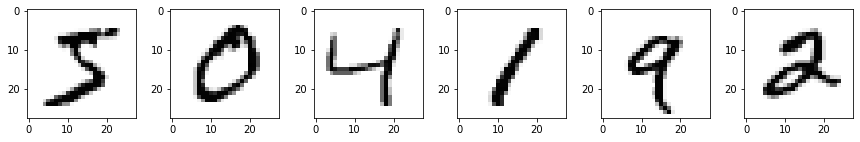

In [9]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Model, Sequential, layers, losses, optimizers
 
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()
X_train = X_train.reshape(-1, 28*28) / 255
X_test = X_test.reshape(-1, 28*28) / 255
 
print(X_train.shape, X_train.dtype) #(60000, 784) float64
print(X_test.shape, X_test.dtype) #(10000, 784) float64
 
print(y_train.shape, y_train[:10]) #(60000,) [5 0 4 1 9 2 1 3 1 4]
print(y_test.shape, y_test[:10]) #(10000,) [7 2 1 0 4 1 4 9 5 9]
 
import matplotlib.pyplot as plt
fig, axes = plt.subplots(1, 6, figsize=(15, 2))
for img, ax in zip(X_train, axes.flat):
  ax.imshow(img.reshape(28, 28), cmap='Greys')
plt.show()

Исходные данные — по 784 пикселя для каждого из 60 000 и 10 000 тестовых изображений, значения пикселей — от 0 (фон) до 1 (цифра). Целевые данные — изображённые цифры от 0 до 9 в label-кодировании.

→ Часто при обучении используются две отложенные выборки: на валидационной настраиваются гиперпараметры, на тестовой проводится финальное тестирование. Сейчас мы для упрощения используем только одну обучающую и одну отложенную выборку.

### ДАВАЙТЕ ОБУЧИМ МОДЕЛЬ!

Наличие GPU многократно ускоряет обучение моделей. Проверьте, что Tensorflow подключен к GPU, выполнив команду:



In [10]:
tf.config.list_physical_devices('GPU')



[]

Если у вас есть видеокарта Nvidia, но TensorFlow её не видит — обновите TensorFlow с помощью conda или pip и следуйте инструкциям из этого гайда (https://www.tensorflow.org/install/gpu#hardware_requirements). Либо вы можете использовать облачные вычисления с помощью Google Colab, Kaggle Kernel, Gradient Community Notebooks и других платформ.

In [11]:
model = Sequential([
  layers.InputLayer(28*28),
  layers.Dense(500, 'relu'),
  layers.Dense(500, 'relu'),
  layers.Dense(10)
])

→ Наша модель не имеет softmax в выходном слое, в этом случае выходные значения называют **logits**. После применения softmax logits **превращаются в вероятности (probabilities).**

In [12]:
model.compile(
    loss=losses.SparseCategoricalCrossentropy(from_logits=True),
    optimizer=optimizers.Adam(),
    metrics='accuracy'
)
 
model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=10,
    batch_size=1024
)

Epoch 1/10
59/59 [==============================] - 2s 20ms/step - loss: 0.4784 - accuracy: 0.8730 - val_loss: 0.2031 - val_accuracy: 0.9415
Epoch 2/10
59/59 [==============================] - 1s 16ms/step - loss: 0.1620 - accuracy: 0.9531 - val_loss: 0.1245 - val_accuracy: 0.9635
Epoch 3/10
59/59 [==============================] - 1s 16ms/step - loss: 0.1051 - accuracy: 0.9692 - val_loss: 0.1083 - val_accuracy: 0.9657
Epoch 4/10
59/59 [==============================] - 1s 19ms/step - loss: 0.0758 - accuracy: 0.9779 - val_loss: 0.0865 - val_accuracy: 0.9743
Epoch 5/10
59/59 [==============================] - 1s 18ms/step - loss: 0.0563 - accuracy: 0.9836 - val_loss: 0.0786 - val_accuracy: 0.9769
Epoch 6/10
59/59 [==============================] - 1s 20ms/step - loss: 0.0441 - accuracy: 0.9872 - val_loss: 0.0713 - val_accuracy: 0.9770
Epoch 7/10
59/59 [==============================] - 1s 16ms/step - loss: 0.0328 - accuracy: 0.9907 - val_loss: 0.0631 - val_accuracy: 0.9802
Epoch 8/10
59

Как видим, каждая эпоха занимает 59 шагов — это размер обучающего датасета (60 000), делённый на размер батча (1024). После каждой эпохи выдаётся значение функции потерь и метрики accuracy на обучающих и валидационных данных.

Мы достигли точности 98% на валидации, то есть модель ошибается лишь в 1 из 50 случаев. Современные нейронные сети на датасете MNIST достигают точности 99.85%, то есть неправильно распознают лишь 1-2 изображения из тысячи. 

### FIT, PREDICT И EVALUATE

Рассмотрим три основных метода для работы с моделями:

1) Метод .fit() обучает модель на данных. Если указан параметр validation_data или validation_split, то после каждой эпохи осуществляется валидация.

2) Метод .predict() возвращает предсказания модели на данных. В качестве альтернативы может вызывать модель как функцию, но тогда данные придётся вручную делить на батчи.

3) Метод .evaluate() оценивает качество модели (loss и метрики) на данных.

Все три метода могут принимать в качестве данных либо массивы, либо итерируемые объекты, которые генерируют батчи обучающих данных.

В Python итерируемым объектом называется объект, который может вернуть некую последовательность элементов. У итерируемых объектов есть метод obj.__iter__(), который также может быть вызван функцией iter(obj). Этот метод возвращает итератор. Итератор хранит указатель на текущий элемент и имеет метод iter.__next__(), который также может быть вызван функцией next(iter). Этот метод как раз и возвращает следующий элемент.

Мы не будем сейчас подробно рассматривать генераторы в Keras (такие как ImageDataGenerator, Sequence или Dataset), поскольку это очень обширная тема. Как правило, подобные инструменты изучаются по мере необходимости путём изучения документации и примеров со StackOverflow. Позже мы будем решать на Keras задачу компьютерного зрения, и там мы будем работать с генераторами.

В документации (https://keras.io/api/models/model_training_apis/) вы можете найти подробное описание всех параметров методов .fit(), .predict() и .evaluate().

Одним из важных параметров в методе fit() является параметр callbacks, который мы сейчас разберём.

### CALLBACKS

⛏ Параметр callbacks в методе fit() означает задание неких действий, которые будут выполнены после каждой эпохи или шага обучения.

Давайте рассмотрим, какие могут быть callbacks и зачем они нужны.

Подробнее о каждом из callbacks и их параметрах читайте в документации (https://keras.io/api/callbacks/).

In [13]:
from tensorflow.keras.callbacks import *
ModelCheckpoint('best_model.h5', monitor='val_accuracy',
                verbose=1, mode='max', save_best_only=True)

Этот callback сохраняет модель в файл best_model.h5 (в текущей рабочей директории) в том случае, если значение val_accuracy после текущей эпохи достигло максимума. Например, после первых пяти эпох точность росла, а в течение следующих пяти эпох — падала. Загрузив модель из файла best_model.h5, вы вернёте состояние модели после первых пяти эпох, когда точность стала максимальной.



In [14]:
EarlyStopping(monitor='val_loss', patience=5)

→ Обучение модели прекращается, если val_loss не падает в течение пяти эпох. Это может говорить о переобучении или стагнации процесса обучения.

**Совет:** не торопитесь прекращать обучение, если метрика качества перестала расти.

Приведём следующую цитату (источник):

Leave it training. I’ve often seen people tempted to stop the model training when the validation loss seems to be leveling off. In my experience networks keep training for unintuitively long time. One time I accidentally left a model training during the winter break and when I got back in January it was SOTA (“state of the art”).

In [15]:
TerminateOnNaN()

Обучение прекращается, если loss стал равным NaN. Это может происходить по многим разным причинам. Среди самых очевидных:

- слишком высокий learning rate;
- отсутствие нормализации входных данных;
- NaN во входных данных;
- ошибки в архитектуре сети.

In [16]:
LambdaCallback(on_epoch_end=lambda epoch, logs:
               print(f'Epoch {epoch} ended... Should we do something?'))

2) Эта функция позволяет выполнять любые действия после конца эпохи или шага обучения (батча), а также и в другие моменты.

→ Если требуется выполнять какие-то действия после каждой эпохи (например, визуализация процесса обучения на графиках, получение предсказаний или изменение обучающих данных), то можно сделать цикл, в котором будет вызываться метод .fit() с параметром epochs=1, а затем будут выполняться остальные необходимые действия. Это удобнее, чем использовать LambdaCallback. Мы рассмотрим такой пример в следующем разделе.

In [18]:
ReduceLROnPlateau()

3) Эта функция уменьшает learning rate в те моменты, когда начинает наблюдаться стагнация процесса обучения, то есть выбранная метрика (по умолчанию val_loss) не улучшается в течение нескольких эпох. Этот callback является хорошей альтернативой плавному уменьшению learning rate от шага к шагу обучения (например ExponentialDecay).



#### ЗАДАНИЯ

В качестве заданий вам предлагается несколько экспериментов с обучением моделей.

Для выполнения каждого из заданий используйте код подготовки данных, создания и компиляции модели из данного раздела. 

Используйте GPU для выполнения заданий для ускорения обучения.

Чтобы ваши ответы сошлись с верными, придерживайтесь следующих правил:

Не меняйте архитектуру модели и другие параметры, если этого не требуется в задании, иначе ответ может не сойтись. Если в данной задаче необходимо изменить какой-то параметр, на другие задачи это не распространяется.
В каждом задании под обученной моделью подразумевается состояние модели после последней эпохи. Не делайте возвращение к эпохе, на которой достигнута наилучшая точность на валидационном датасете, если это не требуется по условию.

Подсказка
Используйте параметр verbose=0 в методах .fit() и .evaluate(), чтобы информация о процессе обучения не выводилась в консоль.

### Задание 6.1

Повторите процедуру создания и обучения модели 50 раз. Обучайте модель в течение 10 эпох. В каждом случае получите предсказания обученной модели на тестовых данных. Сохраните все предсказания в массив — они нам понадобятся далее. Чему равно медианное значение точности (accuracy) на тестовом датасете?
Подсказка
Если предсказания даны в one-hot-кодировании (logits или probabilities), а ответы — в label-кодировании, то посчитать точность можно так (не перепутайте порядок аргументов):


In [ ]:
np.mean(keras.metrics.sparse_categorical_accuracy(y_true, y_pred))

In [20]:
preds = []
from tqdm.notebook import tqdm
for i in tqdm(range(50)):
  model = Sequential([
    layers.InputLayer(28*28),
    layers.Dense(500, 'relu'),
    layers.Dense(500, 'relu'),
    layers.Dense(10)
  ])
  model.compile(
      loss=losses.SparseCategoricalCrossentropy(from_logits=True),
      optimizer=optimizers.Adam(),
      metrics='accuracy'
  )
  model.fit(X_train, y_train, epochs=10, batch_size=1024, verbose=0)
  preds.append(model.predict(X_test))
acc_fn = keras.metrics.sparse_categorical_accuracy
accuracies = [np.mean(acc_fn(y_test, pred)) for pred in preds]
np.median(accuracies)

0.9803

### Задание 6.2

Воспользуйтесь предсказаниями из предыдущего задания и усредните предсказания (logits) по всем моделям. Чему теперь равно значение точности?

In [28]:
# + код предыдущего задания

preds_final = np.array(preds).mean(axis=0)
print(np.mean(acc_fn(y_test, preds_final)))

0.984


### Задание 6.3

Теперь усредните предсказания в виде вероятностей (probabilities) по всем моделям. Чему равно значение точности?

In [29]:
# + код предыдущего задания

preds_final = np.array([tf.nn.softmax(x) for x in preds]).mean(axis=0)
print(np.mean(acc_fn(y_test, preds_final)))

0.9839


### Задание 6.4

Разделите тестовый датасет на две равные части: первые 5 000 примеров и вторые 5 000 примеров (не перемешивая). Создайте модель и обучите её в течение 100 эпох, используя параметр learning_rate=1e-2. После каждой эпохи оцените точность на обоих тестовых датасетах.
Подсказка
Создайте цикл, в котором сначала вызывайте метод .fit() с параметром epochs=1, а затем — дважды метод .evaluate().
Посчитайте среднюю точность (усреднив все значения точности) на обоих тестовых датасетах. Насколько отличается средняя точность на двух датасетах?

In [23]:
from tqdm.notebook import tqdm
X_test1, y_test1 = X_test[:5000], y_test[:5000]
X_test2, y_test2 = X_test[5000:], y_test[5000:]
val_accuracy1_history = []
val_accuracy2_history = []
for epoch_index in tqdm(range(100)):
  model.fit(X_train, y_train, epochs=1, verbose=0, batch_size=1024)
  val_loss1, val_accuracy1 = model.evaluate(X_test1, y_test1, verbose=0)
  val_loss2, val_accuracy2 = model.evaluate(X_test2, y_test2, verbose=0)
  val_accuracy1_history.append(val_accuracy1)
  val_accuracy2_history.append(val_accuracy2)
print(np.mean(val_accuracy2) - np.mean(val_accuracy1))


0.011400043964385986


### Задание 6.5

Посчитайте корреляцию Пирсона между точностью на первом и втором тестовых датасетах. Чему равно значение корреляции?

In [30]:
# + код предыдущего задания

from scipy.stats import pearsonr
print(pearsonr(val_accuracy1_history, val_accuracy2_history))

(0.16789968231536184, 0.09496614781638683)


Из полученных результатов можно сделать вывод о том, что точность модели на некоем тестовом датасете зависит от двух составляющих:

Степень генерализации модели (насколько хорошо модель обучилась под задачу).
Случайный фактор, зависящий от размера датасета и конкретных примеров в нём.
Чем больше датасет, тем надёжнее оценка точности и меньше влияние случайного фактора. Это говорит о том, что корреляция между оценками точности модели на двух больших тестовых датасетах будет выше, чем на двух маленьких. Например, если бы в предыдущих заданиях мы использовали два тестовых датасета всего по 500 чисел, то корреляция точности между ними была бы всего лишь в районе 0.2.

Поэтому если в процессе обучения наблюдается стагнация (точность на валидации перестала расти и начала случайно колебаться), то не торопитесь возвращать состояние модели к той эпохе, на которой точность на валидационном датасете была наибольшей. Возможно, это был случайный скачок точности только для данного датасета.

### 7. Визуализация обучения в Keras

⛏ Воспользуемся кодом из раздела «Обучение моделей в Keras» для подготовки данных, создания и компиляции модели.

В этом разделе мы:

- рассмотрим визуализацию обучения модели с помощью matplotlib;
- обсудим несколько тонкостей, связанных с интерпретацией полученных данных;
- покажем, как можно делать визуализацию с помощью инструмента TensorBoard.

### ГДЕ ХРАНИТСЯ ИСТОРИЯ LOSS И МЕТРИК?

Объект keras.callbacks.History() хранит историю loss и метрик после каждой эпохи.

Если в списке коллбэков, переданных в метод .fit(), не было объекта History, то этот объект автоматически туда добавляется. Этот же объект возвращается из метода .fit(), а также записывается в параметр model.history.

Объект History имеет поле history, которое является словарём:

In [31]:
model.fit(X_train, y_train, epochs=2, batch_size=1024,
          validation_data=(X_test, y_test))
%precision %.3f #устанавливаем точность для метода IPython.display.display
display(model.history.history)

{'accuracy': [0.871, 0.953],
 'loss': [0.471, 0.161],
 'val_accuracy': [0.944, 0.963],
 'val_loss': [0.190, 0.126]}

Epoch 1/2
59/59 [==============================] - 1s 17ms/step - loss: 1.7008e-07 - accuracy: 1.0000 - val_loss: 0.1319 - val_accuracy: 0.9830
Epoch 2/2
59/59 [==============================] - 1s 16ms/step - loss: 1.6591e-07 - accuracy: 1.0000 - val_loss: 0.1326 - val_accuracy: 0.9830


{'loss': [0.000 #устанавливаем точность для метода IPython.display.display,
  0.000 #устанавливаем точность для метода IPython.display.display],
 'accuracy': [1.000 #устанавливаем точность для метода IPython.display.display,
  1.000 #устанавливаем точность для метода IPython.display.display],
 'val_loss': [0.132 #устанавливаем точность для метода IPython.display.display,
  0.133 #устанавливаем точность для метода IPython.display.display],
 'val_accuracy': [0.983 #устанавливаем точность для метода IPython.display.display,
  0.983 #устанавливаем точность для метода IPython.display.display]}

{'accuracy': [0.871 #устанавливаем точность для метода IPython.display.display,
  0.953 #устанавливаем точность для метода IPython.display.display],
 'loss': [0.471 #устанавливаем точность для метода IPython.display.display,
  0.161 #устанавливаем точность для метода IPython.display.display],
 'val_accuracy': [0.944 #устанавливаем точность для метода IPython.display.display,
  0.963 #устанавливаем точность для метода IPython.display.display],
 'val_loss': [0.190 #устанавливаем точность для метода IPython.display.display,
  0.126 #устанавливаем точность для метода IPython.display.display]}

В данном словаре четыре ключа: loss и accuracy при обучении и на валидации.

Рассмотрим один **важный момент**. История loss и accuracy на обучающих данных усредняется по каждой эпохе. Это приводит к тому, что эти показатели оказываются хуже, чем если бы они были рассчитаны на всём обучающем датасете в конце эпохи. Поэтому при визуализации график loss и accuracy на обучающих данных полезно сдвигать влево, от конца к середине эпохи.

Часто возникает ситуация, когда требуется вызывать метод .fit() несколько раз. Например, если вы обучаете модель в несколько стадий или по одной эпохе. Чтобы история не стиралась каждый раз, когда вы вызываетe .fit(), нужно передавать в качестве коллбэка уже существующую историю:

In [ ]:
model.history = keras.callbacks.History()
for epoch in range(10):
  model.fit(..., callbacks=[model.history])

В данном примере в model.history будет накапливаться история по всем 10 эпохам.

### РИСУЕМ ИСТОРИЮ С ПОМОЩЬЮ MATPLOTLIB

⛏ Мы будем использовать ручной цикл, обучая модель по одной эпохе, а затем делая визуализацию. Такой подход более гибкий, чем использование LambdaCallback. Кроме того, в функционировании LambdaCallback есть несколько неочевидных моментов, так что по возможности его лучше избегать.

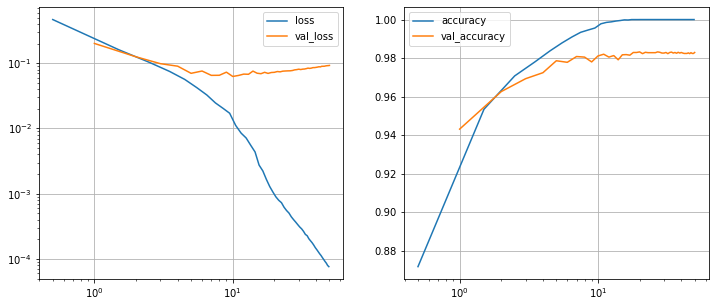

In [33]:
from IPython.display import clear_output
 
model = Sequential([
  layers.InputLayer(28*28),
  layers.Dense(500, 'relu'),
  layers.Dense(500, 'relu'),
  layers.Dense(10)
])
 
model.compile(
    loss=losses.SparseCategoricalCrossentropy(from_logits=True),
    optimizer=optimizers.Adam(),
    metrics='accuracy'
)
 
def visualize(history):
  clear_output(wait=True)
  fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))
  epochs = len(history.history['loss'])
  # на первом графике рисуем loss
  ax1.plot(np.arange(epochs) + 0.5, history.history['loss'], label='loss')
  ax1.plot(np.arange(epochs) + 1, history.history['val_loss'], label='val_loss')
  ax1.set_xscale('log')
  ax1.set_yscale('log')
  ax1.legend()
  ax1.grid()
  # на втором графике рисуем accuracy
  ax2.plot(np.arange(epochs) + 0.5, history.history['accuracy'], label='accuracy')
  ax2.plot(np.arange(epochs) + 1, history.history['val_accuracy'], label='val_accuracy')
  ax2.set_xscale('log')
  ax2.legend()
  ax2.grid()
  plt.show()
 
model.history = keras.callbacks.History()
for epoch in range(50):
  model.fit(X_train, y_train, epochs=1, batch_size=1024,
            validation_data=(X_test, y_test), callbacks=[model.history])
  visualize(model.history)


В результате график обновляется после каждой эпохи. В конце обучения он выглядит так, как выше



Данный раздел предполагает базовое знание библиотеки matplotlib, поэтому мы не разбираем подробно все используемые методы из этой библиотеки.
Loss и accuracy на обучающих данных рассчитываются усреднённо по всей эпохе, и поэтому графики сдвинуты на половину эпохи влево относительно графиков для валидации. Впрочем, для упрощения этого можно и не делать.

→ Для оси времени выбран логарифмический масштаб. Обучение нейронных сетей, как правило, замедляется со временем, и в конце обучения точность может расти настолько медленно, что это будет видно только в логарифмическом масштабе.

→ Если рисовать только один график (без plt.subplots), установить масштаб оси можно такой командой: plt.gca().set_xscale('log'). Полезно знать и другие возможные масштабы, такие как 'symlog' и 'logit'.

Проверьте себя, выполнив задание ниже ↓ После этого мы разберём это задание подробнее.

### Задание 7.1

Какие выводы можно сделать по графикам, приведённым выше?
- По графику loss видно, что модель начала переобучаться
- Модель выдаёт верный ответ на всех обучающих примерах
- Если продолжать обучение, loss на обучающих данных будет убывать

Делаем выводы из графика (разбор задания 7.1)
Модель выдаёт верный ответ на всех обучающих примерах (точность равна единице).

Loss на обучающих примерах будет и далее падать, но не экспоненциально. На графике обе оси отрисованы в логарифмическом масштабе, а график выглядит как прямая линия, то есть при увеличении X в 10 раз Y уменьшится в 10 * C раз, где C — константа, зависящая от наклона прямой. Это означает полиномиальную скорость падения.

Loss на валидации начал расти, то есть процесс генерализации модели остановился и пошёл вспять, и теперь модель только «подгоняется» к конкретным обучающим примерам. График точности на валидации не растёт, поэтому продолжать обучение не имеет смысла.

→ Здесь важно заметить, что такой вывод не всегда верен. Бывают случаи, когда метрика на валидации внезапно начинает расти после долгого периода стагнации, например такое может быть при наличии сильного dropout внутри сети. Но в нашем случае модель очень простая, и здесь можно сделать однозначный вывод, что продолжать обучение не стоит.

### Задание 7.2

Что из перечисленного может быть причиной того, что график точности на валидации опережает график точности на обучающих данных?  
- В модель встроена регуляризация (например dropout), которая ухудшает точность при обучении, но не имеет эффекта при валидации
- Мы обучаем модель с аугментациями изображений, а при валидации не делаем аугментации
- При валидации мы делаем test-time аугментации (TTA), то есть усредняем предсказания на одном и том же изображении с разными аугментациями для повышения точности предсказаний
- Мы сравниваем точность на валидации в конце эпохи и точность на обучающих данных, усреднённую по всей эпохе.
- В валидационный датасет по случайности попали более лёгкие примеры, чем в обучающий датасет

### ВИЗУАЛИЗАЦИЯ С ПОМОЩЬЮ TENSORBOARD

**TensorBoard** — это инструмент для анализа ML-моделей с интерактивным интерфейсом. TensorBoard доступен либо в виде веб-интерфейса (через браузер), либо в виде IPython-виджета (в Python-ноутбуках). 

TensorBoard работает независимо от TensorFlow, «каналом связи» между ними является папка с логами. TensorFlow пишет в неё логи, а TensorBoard их считывает. Такой принцип работы позволяет использовать TensorBoard не только с TensorFlow, но и с PyTorch и другими инструментами.

TensorBoard входит в состав Python-пакета tensorflow, но может быть установлен отдельно:

In [35]:
pip install tensorboard


Note: you may need to restart the kernel to use updated packages.


Познакомиться с TensorBoard можно, запустив ноутбук из официального гайда (https://www.tensorflow.org/tensorboard/get_started). В нём TensorBoard запускается как IPython-виджет.

Есть несколько типов данных, которые можно визуализировать в TensorBoard:

**1) Скаляры**

Различные метрики, которые, как правило, собираются в конце каждой эпохи. Например, функция потерь и точность на обучающих и тестовых данных.

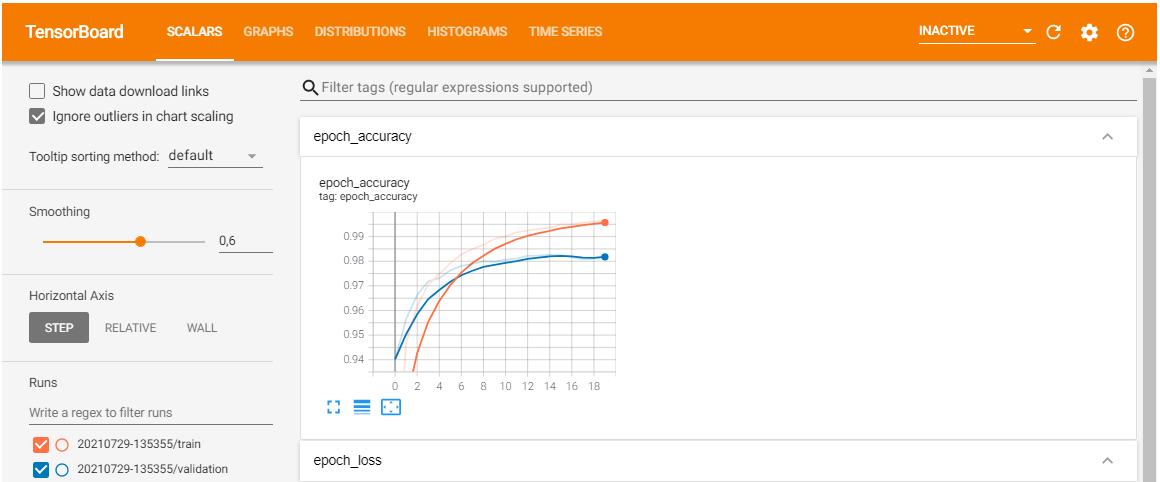

**2) Гистограммы**

На скриншоте ниже "dense_1/bias_0" означает вектор байасов первого полносвязного слоя модели. 20 гистограм соответствуют 20 эпохам обучения.

Мы видим, как менялась гистограмма распределения байасов первого полносвязного слоя в процессе обучения.

Рядом показаны 20 гистограмм для матрицы весов первого слоя ("dense_1/kernel_0").

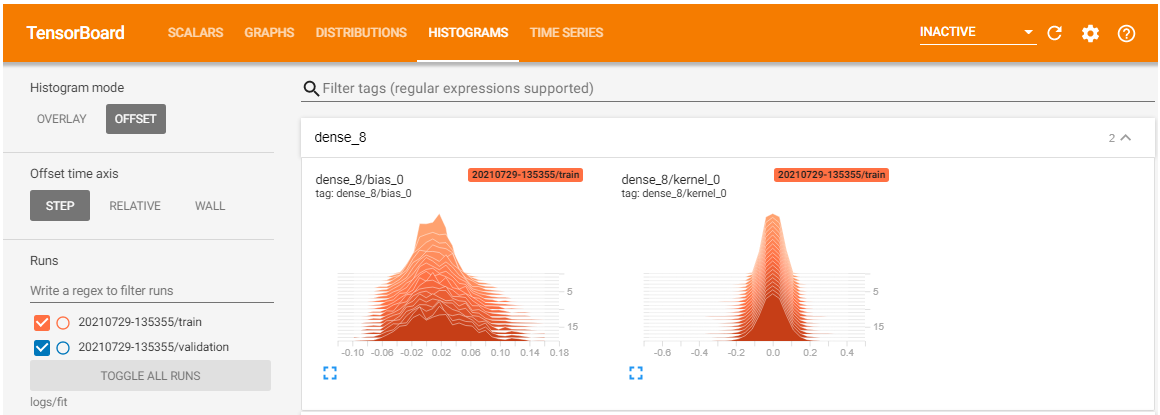

**3) Графы вычислений**

Можно посмотреть, как выглядит граф вычислений целиком, включая функцию потерь и оптимизатор (в TensorFlow они также являются частями графа).

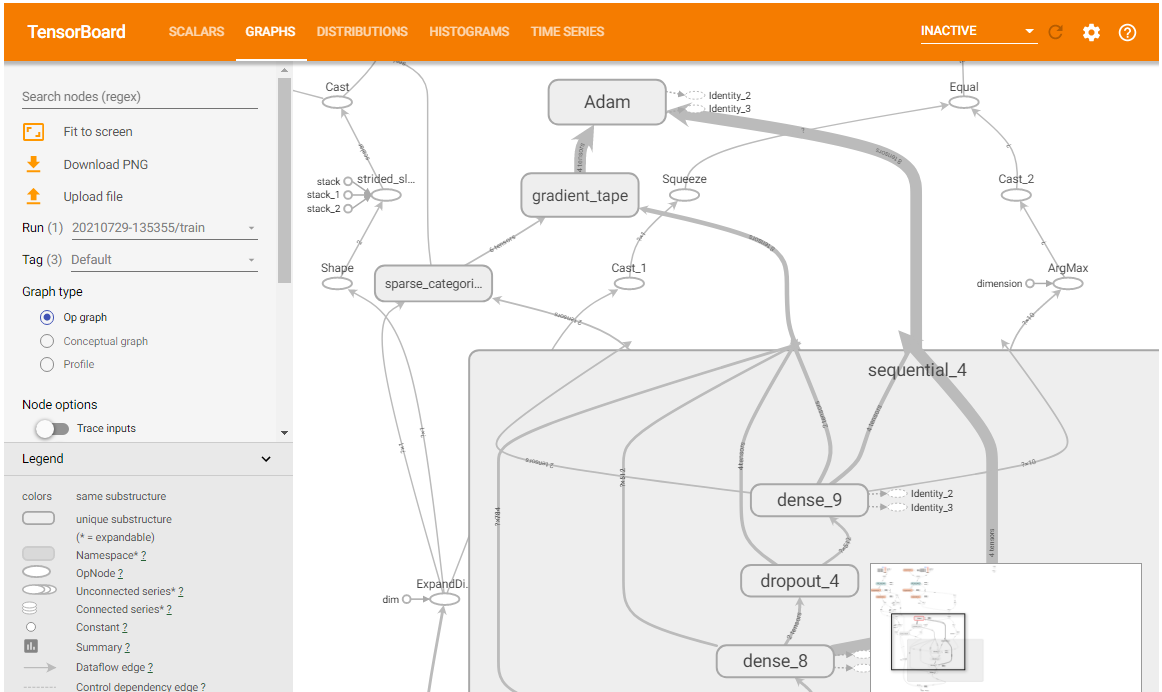

Элементы графа можно «раскрывать» двойным щелчком, если они в свою очередь состоят из вложенных элементов. Например, так устроен полносвязный слой:

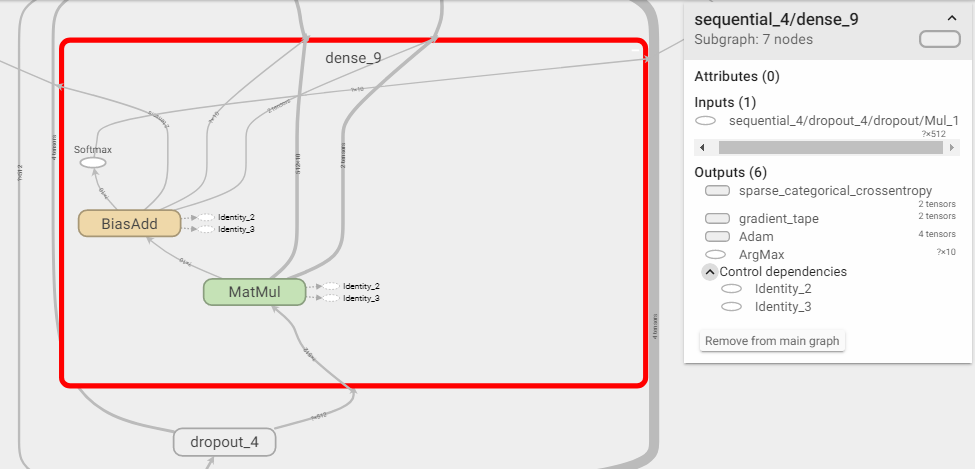

→ В Python-ноутбуках визуализация процесса обучения с помощью matplotlib во многих случаях предпочтительнее, поскольку является более гибкой. TensorBoard удобно использовать в тех случаях, когда отсутствует интерактивная сессия, то есть при запуске Python-скриптов, с которыми можно взаимодействовать только через командную строку.

### 8. Кастомизация моделей и обучения в Keras

⛏ Давайте вспомним материал предыдущих разделов. В Keras мы строили модель в виде статического графа вычислений, то есть все узлы были заранее соединены друг с другом. Мы выбирали функцию потерь, оптимизатор и метрики качества, после чего вызывали метод .fit() для обучения модели. Однако во многих случаях может потребоваться более продвинутая функциональность.

В компьютерном зрении стараются использовать самые новые модели и подходы, которые показывают наилучшие результаты. Для этого требуется читать научные статьи и либо искать их имплементации в виде программного кода, либо самому программировать описанные в них схемы вычислений. Часто эти схемы довольно нетривиальны.

В частности, специалисту по компьютерному зрению полезно уметь следующее:

«Навешивать» на модель дополнительные лоссы, то есть минимизировать одновременно несколько функций потерь (или их сумму, что то же самое).
Обучать параллельно на нескольких датасетах и/или несколько моделей. Типичным примером являются GAN (генеративно-состязательные сети), где две сети обучаются параллельно.
Следить за тем, что происходит внутри сети в процессе обучения.

### ПОСТРОЕНИЕ НЕСТАНДАРТНЫХ СЛОЁВ И МОДЕЛЕЙ

⛏ О построении нестандартных слоёв и моделей с помощью создания подклассов Layer, Model или Sequential можно прочитать в официальном гайде. Поэтому сейчас мы не будем подробно останавливаться на этой теме — лишь упомянем одну важную деталь и приведём пример.

Если мы создаём модель или слой как подкласс, то мы должны определить метод .call(), который преобразует входные данные в выходные. Внутри метода .call() мы используем последовательность операций TensorFlow и возвращаем результат.

→ По умолчанию в Keras строится статический граф вычислений. Это означает, что метод .call() будет вызван лишь один раз для построения статического графа, то есть для соединения операций TensorFlow друг с другом.

Если в методе .call() используются управляющие конструкции языка, такие как if, for, while, continue, break, то они также будут преобразованы в звенья графа, такие как tf.cond и tf.while_loop. Подробнее о том, как это происходит, можно прочитать здесь (https://keras.io/guides/making_new_layers_and_models_via_subclassing/).

Иногда это может быть нежелательно, например если вы хотите использовать в методе .call() внешние переменные или функции из сторонних библиотек. В таком случае в метод .compile() необходимо передать параметр run_eagerly=True, и модель будет выполняться как динамический граф вычислений, то есть метод .call() будет вызываться каждый раз при запуске модели. Однако это может существенно повлиять на производительность.

В качестве примера давайте создадим полносвязную сеть с двумя скрытыми слоями, которые выполняются каждый раз в случайном порядке:

In [36]:
class CustomModel(Model):
  def __init__(self):
    super(CustomModel, self).__init__()
    self.hidden_layers = [layers.Dense(784, 'relu') for _ in range(2)]
    self.head = layers.Dense(10, 'softmax')
  def call(self, input, training=None, order=None):
    output = input
    order = order or np.random.choice(range(2), 2, replace=False)
    for layer_idx in order:
      output = self.hidden_layers[layer_idx](output)
    return self.head(output)

Скомпилируем эту модель с параметром run_eagerly=True и обучим. Будем использовать для обучения подготовленные данные из раздела «Обучение моделей в Keras» (https://lms.skillfactory.ru/courses/course-v1:SkillFactory+DSPR-CV+ALWAYS/courseware/d731eb7febfd43d081a30d0073f4e17a/20e6b15cf28948f0960c99061650cad1/6?activate_block_id=block-v1%3ASkillFactory%2BDSPR-CV%2BALWAYS%2Btype%40vertical%2Bblock%406d35962fb09c4547bce6434263a58d27).



In [37]:
model = CustomModel()
model.compile(loss='sparse_categorical_crossentropy',
              optimizer='adam', metrics='accuracy',
              run_eagerly=True)
model.fit(X_train, y_train, validation_data=(X_test, y_test),
          epochs=20, batch_size=1024)

Epoch 1/20
59/59 [==============================] - 3s 48ms/step - loss: 0.6250 - accuracy: 0.8132 - val_loss: 0.2971 - val_accuracy: 0.9159
Epoch 2/20
59/59 [==============================] - 3s 43ms/step - loss: 0.2334 - accuracy: 0.9320 - val_loss: 0.1775 - val_accuracy: 0.9473
Epoch 3/20
59/59 [==============================] - 3s 47ms/step - loss: 0.1655 - accuracy: 0.9510 - val_loss: 0.1444 - val_accuracy: 0.9565
Epoch 4/20
59/59 [==============================] - 3s 46ms/step - loss: 0.1238 - accuracy: 0.9636 - val_loss: 0.1168 - val_accuracy: 0.9642
Epoch 5/20
59/59 [==============================] - 3s 44ms/step - loss: 0.0983 - accuracy: 0.9715 - val_loss: 0.0977 - val_accuracy: 0.9699
Epoch 6/20
59/59 [==============================] - 3s 46ms/step - loss: 0.1132 - accuracy: 0.9669 - val_loss: 0.0875 - val_accuracy: 0.9725
Epoch 7/20
59/59 [==============================] - 3s 45ms/step - loss: 0.0880 - accuracy: 0.9748 - val_loss: 0.1203 - val_accuracy: 0.9615
Epoch 8/20
59

Теперь дважды получим предсказания: сначала запустим скрытые слои в одном порядке, затем — в обратном порядке. В каждом случае рассчитаем точность на валидации.



In [38]:
from keras.metrics import sparse_categorical_accuracy
preds1 = model(X_test, order=[0, 1]).numpy()
preds2 = model(X_test, order=[1, 0]).numpy()
assert not np.array_equal(preds1, preds2)
print(np.mean(sparse_categorical_accuracy(y_test, preds1))) #0.9832
print(np.mean(sparse_categorical_accuracy(y_test, preds2))) #0.9817
print(np.mean(sparse_categorical_accuracy(y_test, preds1 + preds2))) #0.984

0.9802
0.9792
0.9834


Этот эксперимент демонстрирует высокую способность нейронных сетей к обучению. Даже при условии, что скрытые слои выполнялись каждый раз в произвольном порядке, модель всё равно смогла обучиться и выдаёт высокую точность. Более того, из данной модели можно сделать ансамбль, запустив скрытые слои во всех возможных порядках и усреднив предсказания.

Динамический граф вычислений проще программировать, но в большинстве случаев можно построить и статический граф. Например, для придуманной нами сети, в которой скрытые слои запускаются в случайном порядке, статический граф строится следующим образом:

In [ ]:
def call_hidden_layers_in_order(self, input, order):
    output = input
    for layer_idx in order:
      output = self.hidden_layers[layer_idx](output)
    return output
  def call(self, input, training=None, order=None):
    if order:
      output = self.call_hidden_layers_in_order(input, order)
    else:
      all_possible_orders = list(permutations(range(self.hidden_layers_count)))
      all_outputs_dict = {order: self.call_hidden_layers_in_order(input, order)
                          for order in all_possible_orders}
      all_outputs = tf.stack(list(all_outputs_dict.values()))
      index = tf.random.uniform((), minval=0, maxval=len(all_outputs),
                                dtype=tf.int32)
      output = all_outputs[index]
    return self.head(output)

При первом взгляде на код может показаться, что мы вызываем слои во всех возможных порядках, и затем случайно выбираем один из получившихся результатов, что неэффективно с вычислительной точки зрения. Но если мы не передаём в .compile() параметр run_eagerly=True, то метод .call() вызывается только один раз и строит статический граф вычислений. Поэтому такой метод построения наоборот существенно ускорит обучение и инференс сети.

### КАСТОМИЗАЦИЯ ЦИКЛА ОБУЧЕНИЯ

⛏ Ранее для обучения мы всегда использовали метод .fit(), который делал за нас всю необходимую работу. Для большего контроля над тем, что происходит при обучении, мы можем написать цикл обучения вручную. Для этого нам нужно будет запускать модель, считать функцию потерь, брать откуда-то градиенты и передавать их в оптимизатор.

О том, как писать кастомный цикл обучения, рассказано в двух официальных гайдах (один, два).

Давайте рассмотрим пример. Будем использовать для обучения подготовленные данные из раздела «Обучение моделей в Keras».

In [41]:
class CustomSequential(Sequential):
  def train_step(self, data):
    x, y = data
    with tf.GradientTape() as tape:
        y_pred = self(x, training=True)
        loss = self.compiled_loss(y, y_pred, regularization_losses=self.losses)
    trainable_vars = self.trainable_variables
    gradients = tape.gradient(loss, trainable_vars)
    self.optimizer.apply_gradients(zip(gradients, trainable_vars))
    self.compiled_metrics.update_state(y, y_pred)
    return {m.name: m.result() for m in self.metrics}
 
model = CustomSequential([
  layers.InputLayer(28*28),
  layers.Dense(784, 'relu'),
  layers.Dense(784, 'relu'),
  layers.Dense(10, 'softmax')
])
 
model.compile(loss='sparse_categorical_crossentropy',
              optimizer='adam', metrics='accuracy')
model.fit(X_train, y_train, validation_data=(X_test, y_test),
          epochs=20, batch_size=1024)

Epoch 1/20
59/59 [==============================] - 2s 35ms/step - loss: 0.3995 - accuracy: 0.8900 - val_loss: 0.1613 - val_accuracy: 0.9518
Epoch 2/20
59/59 [==============================] - 2s 29ms/step - loss: 0.1283 - accuracy: 0.9627 - val_loss: 0.1148 - val_accuracy: 0.9648
Epoch 3/20
59/59 [==============================] - 2s 27ms/step - loss: 0.0829 - accuracy: 0.9759 - val_loss: 0.0804 - val_accuracy: 0.9746
Epoch 4/20
59/59 [==============================] - 2s 33ms/step - loss: 0.0560 - accuracy: 0.9841 - val_loss: 0.0799 - val_accuracy: 0.9751
Epoch 5/20
59/59 [==============================] - 2s 31ms/step - loss: 0.0422 - accuracy: 0.9878 - val_loss: 0.0663 - val_accuracy: 0.9791
Epoch 6/20
59/59 [==============================] - 2s 30ms/step - loss: 0.0292 - accuracy: 0.9918 - val_loss: 0.0627 - val_accuracy: 0.9800
Epoch 7/20
59/59 [==============================] - 2s 30ms/step - loss: 0.0220 - accuracy: 0.9938 - val_loss: 0.0670 - val_accuracy: 0.9786
Epoch 8/20
59

В данном коде мы переопределяем шаг обучения для модели. Те действия, которые ранее делались автоматически, мы теперь пишем вручную. Мы получаем на вход батч данных и выполняем следующие шаги:

1) Получаем предсказания модели в режиме обучения и рассчитываем loss. Эти операции мы делаем в контексте объекта tf.GradientTape(), чтобы затем получить градиенты.

2) У каждой модели есть параметр .trainable_variables, в котором хранится список тензоров, являющихся обучаемыми весами модели. Мы обращаемся к этому параметру.

3) Получаем значения градиентов для тензоров trainable_vars из объекта tf.GradientTape().

4) Передаём веса и градиенты оптимизатору, который обновляет веса, используя градиенты.

5) В последних двух строках метода train_step работаем с метриками.

⛏ В данном разделе мы рассмотрели примеры написания кастомного метода .call() для модели и кастомного цикла обучения. Когда мы будем изучать PyTorch, мы увидим, что в нём такой способ программирования является стандартом. Впрочем, есть и высокоуровневый фреймворк PyTorch Lightning, который позволяет писать более лаконичный код.

### 9. Работа с данными в Keras. Часть I

⛏ В предыдущих разделах мы рассмотрели процесс создания и обучения моделей, однако не менее важным и сложным является процесс подготовки данных.

При работе с датасетами возникают следующие технические сложности:

⛔ Датасет часто не помещается в память целиком, поэтому его следует постепенно подгружать с диска в процессе обучения модели.

⛔ Важно обеспечить высокую производительность процесса аугментаций и возможность распараллеливания.

⛔ Аренда GPU cтоит денег, поэтому важно следить за загруженностью видеокарт, чтобы они не простаивали без дела. Для этого используются инструменты профилирования.

Как правило, в метод .fit() передаются не массивы данных (как мы делали ранее), а генераторы. В данном разделе мы сначала рассмотрим наиболее простые варианты генераторов, а затем изучим **ImageDataGenerator**. В следующем разделе мы рассмотрим наиболее продвинутый и производительный инструмент tf.data.Dataset.

Для полноты картины упомянем, что при работе с датасетами также возникают следующие сложности общего характера:

⛔ Часто данные приходится собирать, очищать и размечать самостоятельно или с применением «рабочей силы», такой как Amazon Mechanical Turk.

⛔ Датасет может быть доступен только по запросу с заполнением лицензионного соглашения. При этом ответа может не последовать либо сайт для отправки запроса может не работать.

⛔ Из-за авторских прав набор данных может содержать не сами изображения и видео, а гиперссылки на них. Их приходится скачивать самостоятельно, причём некоторые из них могут быть уже удалены.

⛔ Датасет может иметь неполную документацию, запутанную структуру папок, необычные форматы файлов.

### ИТЕРАТОРЫ И KERAS.UTILS.SEQUENCE

В метод .fit() можно передавать любой итерируемый объект, который возвращает пары из батча исходных данных и батча ответов.

Давайте повторим, что такое итераторы и генераторы в Python.

**Итератор** (https://docs.python.org/3/glossary.html#term-iterator) — это объект, имеющий метод .__next__() для получения следующего элемента последовательности. Если элементы закончились, метод выбрасывает исключение StopIteration.

**Генератор** (https://docs.python.org/3/glossary.html#term-generator) — это функция, содержащая инструкцию yield. При выполнении такая функция возвращает итератор. Впрочем, на практике под «генератором» иногда понимают любой итератор, используя эти слова как синонимы.

**Итерируемый объект (iterable-объект)** — это объект, содержимое которого можно перебрать. Такой объект должен иметь метод .__iter__(), возвращающий итератор, или метод .__getitem__(), возвращающий элемент с указанным индексом. Во втором случае объект называется **последовательностью** (https://docs.python.org/3/glossary.html#term-sequence).

Итератор, возвращаемый методом .__iter__(), играет роль указателя на текущий элемент. Для итерируемого объекта можно одновременно создать несколько итераторов, они будут работать независимо.

→ Итераторы также являются итерируемыми объектами: их метод .__iter__() возвращает сам объект (self).

Приведём минималистичный пример, демонстрирующий использование итератора для обучения. Будем обучать модель на массиве из нулей.

In [42]:
from tensorflow.keras import Sequential, layers
import numpy as np
 
def zeros_generator():
  while True:
    yield np.zeros((64, 100)), np.zeros((64, 10))
 
model = Sequential([layers.Dense(10)])
model.compile(loss='mse', optimizer='adam')
model.fit(zeros_generator(), steps_per_epoch=10)

10/10 [==============================] - 0s 732us/step - loss: 0.0000e+00


→ При обучении моделей рекомендуется использовать не простые iterable-объекты, а последовательности, которые могут вернуть элемент по его индексу (метод .__getitem__()). В этом случае обучение легче распараллеливается. Последовательность можно создавать как подкласс keras.utils.Sequence. Этот класс (https://github.com/tensorflow/tensorflow/blob/v2.5.0/tensorflow/python/keras/utils/data_utils.py#L393-L468) «заранее» не имеет никакой функциональности — всю функциональность вы пишете сами. 

В документации (https://keras.io/api/utils/python_utils/#sequence-class) приведён пример использования Sequence. Сейчас мы не будем подробно останавливаться на этом классе. Далее мы познакомимся с более удобными инструментами, где вручную нужно будет писать меньше кода.

### IMAGEDATAGENERATOR

⛏ Данный класс предназначен для загрузки изображений (с диска или из NumPy-массива), аугментаций и объединения в батчи.

Покажем его работу на примере.

Загрузим датасет beans, содержащий три класса изображений листьев бобов. Один класс соответствует здоровым листьям (healthy), два других класса — больным (angular_leaf_spot и bean_rust).

In [ ]:
!mkdir beans_dataset
%cd beans_dataset
!wget -q https://storage.googleapis.com/ibeans/train.zip
!wget -q https://storage.googleapis.com/ibeans/validation.zip
!wget -q https://storage.googleapis.com/ibeans/test.zip
!unzip -q train.zip && rm train.zip
!unzip -q validation.zip && rm validation.zip
!unzip -q test.zip && rm test.zip
!tree -d #требует !apt-get install tree

Структура папок:

In [ ]:
.
├── test
│   ├── angular_leaf_spot
│   ├── bean_rust
│   └── healthy
├── train
│   ├── angular_leaf_spot
│   ├── bean_rust
│   └── healthy
└── validation
    ├── angular_leaf_spot
    ├── bean_rust
    └── healthy

В каждой из девяти папок хранятся изображения.

С помощью кода ниже мы создаём объект train_generator, который можно использовать в методе .fit().

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
 
train_datagen = ImageDataGenerator(
    #rescale=1/255,
    horizontal_flip=True,
    rotation_range=10,
    shear_range=0.2,
    brightness_range=(0.8, 1.2),
)
 
train_generator = train_datagen.flow_from_directory(
    'train',
    target_size=(128, 128),
    batch_size=32,
    class_mode='categorical',
    shuffle=True,
)

→ Создавая объект ImageDataGenerator, мы указываем необходимые преобразования, которые следует провести с каждым изображением. В первую очередь это аугментации. Затем, вызывая метод flow_from_directory (или методы flow, flow_from_dataframe — см. документацию (https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/image/ImageDataGenerator)), мы указываем, откуда брать изображения. В результате получаем итератор.

После выполнения кода выше ни одно изображение не было считано с диска. Изображения считываются «по требованию», то есть когда мы начнём перебирать итератор. 

→ Давайте изучим свойства train_generator.

Всего итератор может вернуть 1034 изображения, объединённых в 33 батча:

In [ ]:
print(len(train_generator), train_generator.n) #33 1034

Именам классов (то есть именам папок на диске) были присвоены индексы:



In [ ]:
print(train_generator.class_indices)
#{'angular_leaf_spot': 0, 'bean_rust': 1, 'healthy': 2}

Итератор возвращает пару из исходных и целевых данных: 32 изображения размером 128x128 с тремя цветовыми каналами (RGB) и метки классов в one-hot-кодировании:

In [ ]:
X, y = next(train_generator)
print(X.shape, y.shape) #(32, 128, 128, 3) (32, 3)

Команда .reset() позволяет вернуться к началу и перебирать изображения заново:



In [ ]:
print(train_generator.batch_index) #1
train_generator.reset()
print(train_generator.batch_index) #0

→ После завершения перебора итератор вернётся к началу автоматически, то есть исключение StopIteration никогда не будет выброшено. Поэтому в методе .fit() нам нужно указать параметр steps_per_epoch.

Давайте обучим модель. Для упрощения кода мы сейчас не используем валидационный и тестовый датасеты.



In [ ]:
from tensorflow.keras import Sequential, layers, losses
from tensorflow.keras.applications import EfficientNetB0
 
model = Sequential([
  EfficientNetB0(input_shape=(128, 128, 3), include_top=False),
  layers.GlobalMaxPool2D(),
  layers.Dropout(0.5),
  layers.Dense(3)
])
model.compile(
    loss=losses.CategoricalCrossentropy(from_logits=True),
    optimizer='adam',
    metrics='accuracy'
)
model.fit(train_generator, steps_per_epoch=len(train_generator), epochs=20)

→ Если мы выполняем аугментации, всегда следует проверять визуально, что в итоге получается, чтобы избежать ошибок.

Давайте посмотрим на шесть изображений из нашего итератора:

In [ ]:
import itertools
import matplotlib.pyplot as plt
import numpy as np
 
def show_first_images(generator, count=6, labels=True, figsize=(20, 5), normalized=False):
  fig, axes = plt.subplots(nrows=1, ncols=count, figsize=figsize)
  for batch, ax in zip(generator, axes.flat):
    if labels:
      img_batch, labels_batch = batch
      img, label = img_batch[0], np.argmax(labels_batch[0]) #берем по одному изображению из каждого батча
    else:
      img_batch = batch
      img = img_batch[0]
    if not normalized:
      img = img.astype(np.uint8)
    ax.imshow(img)
    # метод imshow принимает одно из двух:
    # — изображение в формате uint8, яркость от 0 до 255
    # — изображение в формате float, яркость от 0 до 1
    if labels:
      ax.set_title(f'Class: {label}')
  plt.show()
 
show_first_images(train_generator)


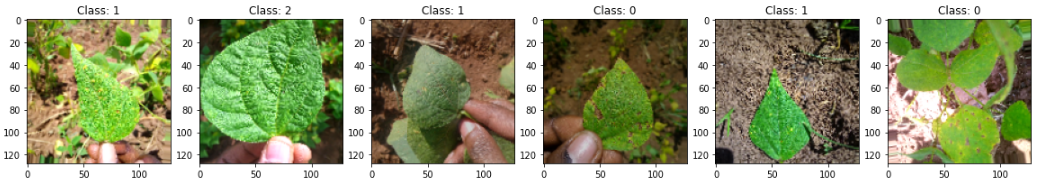

### ИСПОЛЬЗОВАНИЕ ALBUMENTATIONS С IMAGEDATAGENERATOR

Ранее вы уже познакомились с библиотекой albumentations. Встроить её в ImageDataGenerator можно с помощью указания параметра preprocessing_function:



In [ ]:
!pip install albumentations -q -U
 
import albumentations as A
 
def augment(image):
  image = image.astype(np.uint8)
  aug = A.Compose([
      A.Cutout(p=0.5, num_holes=1, max_h_size=150, max_w_size=200),
      A.Cutout(p=0.5, num_holes=1, max_h_size=100, max_w_size=150), #второй раз
      A.Cutout(p=0.5, num_holes=1, max_h_size=80, max_w_size=100), #третий раз
      A.HorizontalFlip(p=0.5),
      A.ShiftScaleRotate(p=0.7),
      A.HueSaturationValue(p=1),
      # Читайте документацию, прежде чем копировать и использовать этот код!
      # https://albumentations.ai/docs/api_reference/augmentations/transforms/
      # https://albumentations.ai/docs/examples/example/
      # Данный набор аугментаций — лишь пример.
      # Подумайте сами, как будет лучше, почитайте в интернете статьи по этой теме.
  ])
  return aug(image=image)['image']
 
my_datagen = ImageDataGenerator(
    preprocessing_function=augment
)
 
for _ in range(3):
  my_generator = my_datagen.flow_from_directory(
      'train',
      target_size=(384, 384),
      batch_size=4,
      shuffle=True
  )
  show_first_images(my_generator)

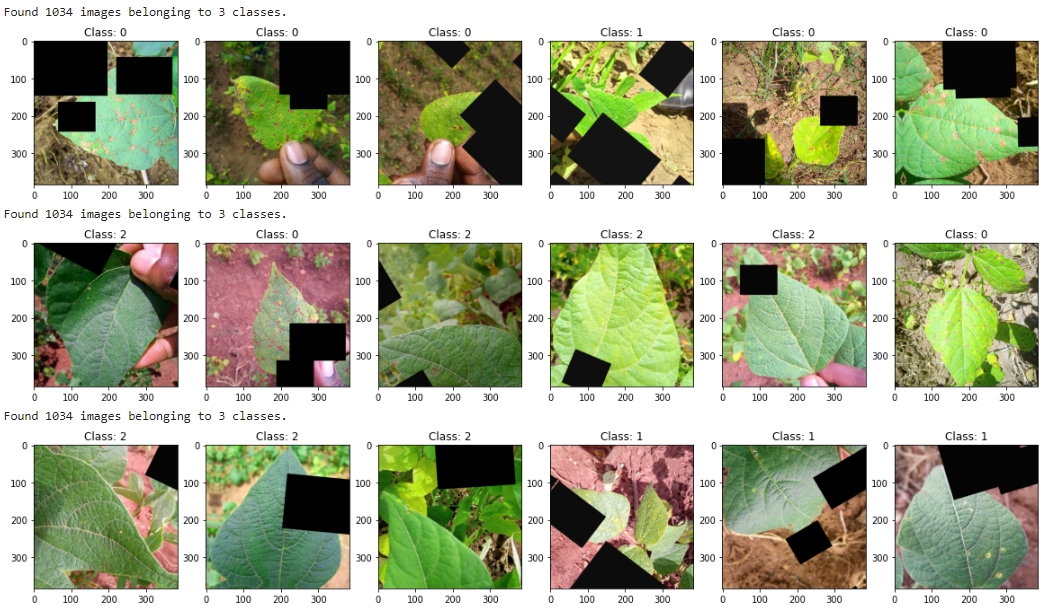

⛏ Часто бывает полезно просматривать исходный код используемых библиотек — это и предлагается сделать в качестве задания к данному разделу ↓

### Задание 9.1

Изучите исходный код ImageDataGenerator, чтобы ответить на вопрос: с помощью какой операции осуществляется случайный поворот изображения (параметр rotation_range)?
Подсказка
В Python есть встроенные механизмы интроспекции. Например, имея некий метод, можно напечать его исходный код.

Для начала поймём, какой метод мы хотим исследовать. Сам объект ImageDataGenerator не умеет возвращать батчи из изображений. Для начала его нужно преобразовать в генератор, например, с помощью вызова метода .flow_from_directory(), как это делалось в коде выше. Полученный объект train_generator является итератором, то есть имеет метод .__next__(), который возвращает батч изображений и меток. Посмотреть исходный код этого метода можно таким образом:

In [ ]:
import inspect
print(inspect.getsource(train_generator.__next__))

# Этот код напечатает следующее:

def __next__(self, *args, **kwargs):
    return self.next(*args, **kwargs)

Переменная self хранит текущий объект. Мы видим, что этот метод в свою очередь вызывает метод train_generator.next. Теперь таким же образом напечатаем код этого метода, и так далее. Так мы будем постепенно углубляться во вложенные методы и приближаться к интересующему нас преобразованию.

Есть и другие способы интроспекции. Например, напечатав аттрибут .__code__, мы увидим имя файла с исходным кодом:



In [ ]:
train_generator.__next__.__code__

Выход:

In [ ]:
<code object __next__ at 0x7fe4c0e0ad20, file "/usr/local/lib/python3.7/dist-packages/
keras_preprocessing/image/iterator.py", line 103>

Как видим, исходный код хранится в файле keras_preprocessing/image/iterator.py. Можно задать поиск в интернете по имени файла и найти исходный код на GitHub либо продолжить применять интроспекцию с помощью getsource.

Подсказка (1 из 1):
Напечатаем исходный код метода .next():



In [ ]:
print(inspect.getsource(train_generator.next))

Идём дальше:

In [ ]:
print(inspect.getsource(train_generator._get_batches_of_transformed_samples))

В коде видим вызов двух методов: get_random_transform и apply_transform. Нас интересует последний.

In [ ]:
print(inspect.getsource(train_generator.image_data_generator.apply_transform))

Отсюда идёт вызов метода apply_affine_transform, который вызывается без префикса self. Это значит, что данный метод является внешним и не относится к данному объекту. Значит, либо он объявляется в файле с исходным кодом, либо импортируется.

Посмотрим путь к файлу с исходным кодом:

In [ ]:
train_generator.image_data_generator.apply_transform.__code__

Здесь проще всего поискать в интернете по запросу "image/image_data_generator.py github" или "keras apply_affine_transform github", хотя можно и открыть данный файл локально. В итоге мы найдём исходный код (https://github.com/keras-team/keras-preprocessing/blob/master/keras_preprocessing/image/affine_transformations.py#L279) этой функции.

Как видим, сначала создаётся матрица поворота rotation_matrix, затем эта матрица умножается на матрицы других преобразований (shift, shear, zoom). Таким образом мы получаем матрицу аффинного преобразования (https://ru.wikipedia.org/wiki/%D0%90%D1%84%D1%84%D0%B8%D0%BD%D0%BD%D0%BE%D0%B5_%D0%BF%D1%80%D0%B5%D0%BE%D0%B1%D1%80%D0%B0%D0%B7%D0%BE%D0%B2%D0%B0%D0%BD%D0%B8%D0%B5). Наконец, к изображению (переданному в функцию как параметр x) эта матрица применяется с помощью метода ndimage.interpolation.affine_transform из библиотеки SciPy.

ОТВЕТ:
- scipy.ndimage.interpolation.affine_transform 

Выводы из задания 9.1 мы рассмотрим в следующем разделе →

### 10. Работа с данными в Keras. Часть II

⛏ В предыдущем разделе мы рассмотрели построение генераторов изображений с аугментациями с помощью ImageDataGenerator. При этом для выполнения аугментаций не используются тензоры и операции TensorFlow. Это означает, что аугментации изображений не являются частью графа вычислений и выполняются на CPU, а не на GPU.

В этом разделе мы увидим, как сделать аугментации частью графа вычислений и выполнять их на GPU с большей производительностью.

### АУГМЕНТАЦИИ С ПОМОЩЬЮ СЛОЁВ KERAS PREPROCESSING

→ В данном методе аугментации (такие как поворот, отражение) являются слоями модели. Конечно, многие аугментации могут не быть дифференцируемыми, но это и не требуется. Такие слои встраиваются в начало модели и не обучаются.

Для начала подготовим данные (используем код скачивания датасета beans из предыдущего раздела) и создадим генератор без аугментаций:

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
 
train_generator = ImageDataGenerator().flow_from_directory(
    'train',
    target_size=(300, 300),
    batch_size=32,
    class_mode='categorical',
    shuffle=True,
)
 
show_first_images(train_generator)

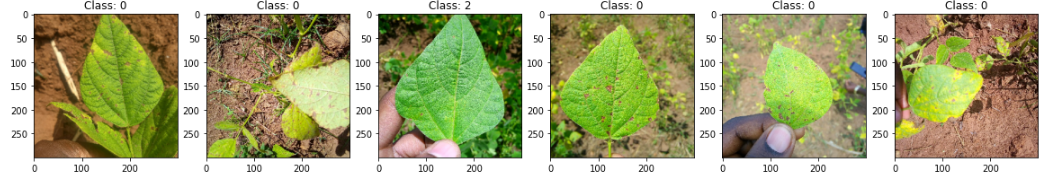

Этот генератор возвращает изображения в формате float, значения пикселей меняются от 0 до 255 (так как не указан параметр rescale), то есть изображения не нормализованы.

→ Аугментации можно выполнять с помощью слоёв из модуля keras.layers.experimental.preprocessing. Эти аугментации выполняются на GPU, что намного быстрее albumentations, который не использует GPU. Однако набор доступных аугментаций меньше. Для расширения набора доступных аугментаций можно использовать tensorflow_addons.

In [48]:
!pip install tensorflow_addons -q
import tensorflow_addons as tfa

from tensorflow.keras import Sequential, layers
from tensorflow.keras.layers.experimental import preprocessing
from tensorflow.keras.applications import EfficientNetB0
 
preprocessing_model = Sequential([
  preprocessing.RandomCrop(200, 200),
  preprocessing.RandomFlip(mode='horizontal'),
  layers.Lambda(lambda images: tfa.image.random_cutout(images, (100, 100))),
  preprocessing.RandomRotation(0.1),
])
 
my_model = Sequential([
  preprocessing_model,
  EfficientNetB0(weights='imagenet', input_shape=(200, 200, 3), include_top=False),
  layers.GlobalMaxPool2D(),
  layers.Dropout(0.5),
  layers.Dense(10)
])

Слои preprocessing работают только в режиме обучения, тогда как слой Lambda работает и при обучении, и при инференсе. 

Визуализировать изображения с аугментациями можно, выполнив следующий код:

In [ ]:
def augment_batch_to_visualize(X, y):
  return preprocessing_model(X, training=True).numpy(), y
 
show_first_images((augment_batch_to_visualize(X, y) for X, y in train_generator))

### МОДУЛЬ TF.DATA

→ Этот модуль представляет собой наиболее продвинутый пайплайн подготовки данных в TensorFlow.

Основным объектом, с которым мы будем работать, является tf.data.Dataset.

Dataset хранит информацию о конечном или бесконечном наборе элементов и может возвращать эти элементы по очереди. То есть Dataset является итерируемым объектом.

Элементом, как правило, являются входные и целевые данные для нейронной сети либо батч таких данных. Элемент — это, как правило, кортеж (в простом случае) или словарь.

Dataset позволяет выполнять с данными цепочки преобразований, которые осуществляются по мере необходимости (lazy evaluation).

Пока всё выглядит достаточно просто, но есть одна тонкость — Dataset строится как статический граф вычислений.

✔ С одной стороны, это является плюсом: граф компилируется и выполняется на языке C++, эффективно оптимизируется, масштабируется и распараллеливается.

⛔ С другой стороны, в статическом графе все операции должны быть операциями TensorFlow, что усложняет работу. Если требуется применить функцию из другой библиотеки (например, из albumentations), то нужно «оборачивать» эту функцию в tf.py_function. В целом рекомендуется так не делать, а применять только операции TensorFlow. Например, граф с tf.py_function не сможет выполняться на ускорителе TPU.

Резюме: tf.data.Dataset является статическим графом вычислений, описывающим цепочку преобразований данных перед их подачей в нейронную сеть. В графе мы применяем только операции TensorFlow. 

Есть два способа создать Dataset из изображений, которые мы ранее загрузили в папку beans_dataset.

**1) Простой способ:**

In [ ]:
import tensorflow_datasets as tfds
builder = tfds.ImageFolder('.')
dataset = builder.as_dataset(split='train', shuffle_files=True)
tfds.show_examples(dataset, builder.info, rows=1, cols=6);

Здесь мы используем объект ImageFolder (https://www.tensorflow.org/datasets/api_docs/python/tfds/folder_dataset/ImageFolder). Посмотрим, в каком формате датасет возвращает элементы:

In [ ]:
element_dict = next(iter(dataset))
{x: (y.shape, y.dtype) for x, y in element_dict.items()}

Выход:

In [ ]:
{'image': (TensorShape([500, 500, 3]), tf.uint8),
 'image/filename': (TensorShape([]), tf.string),
 'label': (TensorShape([]), tf.int64)}

Элемент является словарём, содержащим изображение 500x500, имя файла и метку класса (ту же информацию можно получить, обратившись к атрибуту dataset.element_spec).

Нам осталось применить аугментации, объединить изображения в батчи и обучить модель. Аугментации можно встроить в модель (как мы делали это ранее) или использовать функцию map().

Важно! Применяя аугментации (с помощью tfa.image, preprocessing layers, albumentations или любых других средств) всегда следите, в каком формате ваше изображение (float или uint8) и каков диапазон значений пикселей. В документации к функциям, как правило, написано о том, в каком формате они принимают и возвращают изображение.

In [ ]:
import tensorflow as tf
import tensorflow_addons as tfa
 
# отбрасываем имена файлов и возвращаем кортеж (изображение, метка)
def to_tuple(image_dict):
  return image_dict['image'], tf.one_hot(image_dict['label'], depth=3)
 
dataset_augmented = dataset.map(to_tuple).batch(32)
 
show_first_images(dataset_augmented.as_numpy_iterator())

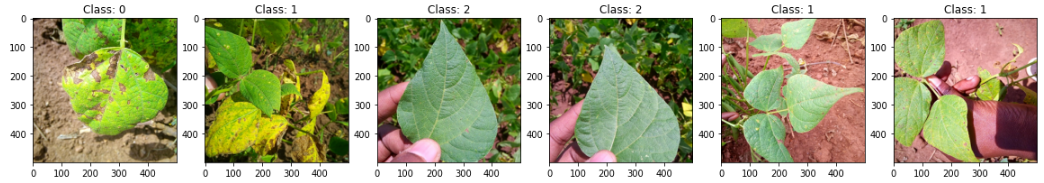

#### СОВЕТЫ

1) Следите за производительностью аугментаций. Создав пайплайн, запустите процесс расчёта аугментаций на всём датасете и измерьте время. Так вы узнаете, сколько процентов времени тратится на аугментации, а сколько остаётся на обучение.

2) Если аугментации отнимают слишком много вычислительных ресурсов, попробуйте найти ту операцию, которая занимает наибольший процент времени, и убрать её или заменить на другую.

3) Если ваш датасет не слишком большой, а вы хотите повторять процесс обучения многократно, то можете выполнить наиболее «вычислительно тяжёлые» аугментации заранее и сохранить по 10-20 разных вариантов изображения на диск, а в пайплайне оставить только «лёгкие» аугментации.

4) Если вам требуется максимальная производительность, можете выполнять аугментации на одном сервере и в режиме реального времени передавать на другой сервер, где обучается модель.

5) Вы можете использовать файлы .tfrec для сохранения и загрузки изображений. В этом случае на диск записываются большие файлы, содержащие множество изображений, поэтому операция чтения с диска выполняется быстрее, чем когда каждое изображение хранится в виде отдельного файла.

6) В целом для оптимизации процесса обучения следует найти «бутылочное горлышко» (bottleneck) — операцию, которая выполняется дольше всех и задерживает функционирование остальных узлов системы. Это может быть чтение с диска, передача по сети, аугментации или обучение. В первую очередь займитесь оптимизацией именно этой операции.